In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as sts
import scipy.stats as stats
import plotly.express as px

# Đánh giá tự do kinh tế của các quốc gia trên thế giới năm 2019

In [2]:
data = pd.read_csv('economic_freedom_index2019_data.csv',encoding='latin')

## Biểu diễn dữ liệu

In [3]:
df = data.copy()

In [4]:
df

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,...,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,1,Afghanistan,Afghanistan,Asia-Pacific,152.0,39.0,51.5,19.6,29.6,25.2,...,Afghanistan,35.5,$69.6,2.5,2.9,"$1,958",8.8,5.0,53.9,7.3
1,2,Albania,Albania,Europe,52.0,27.0,66.5,54.8,30.6,40.4,...,Albania,2.9,$36.0,3.9,2.5,"$12,507",13.9,2.0,"1,119.1",71.2
2,3,Algeria,Algeria,Middle East and North Africa,171.0,14.0,46.2,31.6,36.2,28.9,...,Algeria,41.5,$632.9,2.0,3.1,"$15,237",10.0,5.6,"1,203.0",25.8
3,4,Angola,Angola,Sub-Saharan Africa,156.0,33.0,50.6,35.9,26.6,20.5,...,Angola,28.2,$190.3,0.7,2.9,"$6,753",8.2,31.7,"-2,254.5",65.3
4,5,Argentina,Argentina,Americas,148.0,26.0,52.2,47.8,44.5,33.5,...,Argentina,44.1,$920.2,2.9,0.7,"$20,876",8.7,25.7,"11,857.0",52.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,179,Venezuela,Venezuela,Americas,179.0,32.0,25.9,7.6,13.1,7.9,...,Venezuela,31.4,$380.7,-14.0,-7.8,"$12,114",7.7,1087.5,-68.0,34.9
182,180,Vietnam,Vietnam,Asia-Pacific,128.0,30.0,55.3,49.8,40.3,34.0,...,Vietnam,93.6,$647.4,6.8,6.2,"$6,913",2.1,3.5,"14,100.0",58.2
183,181,Yemen,Yemen,Middle East and North Africa,NaN,NaN,NaN,19.6,22.2,20.3,...,Yemen,30.0,$38.6,-13.8,-16.1,"$1,287",14.0,4.9,-269.9,141.0
184,182,Zambia,Zambia,Sub-Saharan Africa,138.0,27.0,53.6,45.0,35.6,32.3,...,Zambia,17.2,$68.9,3.6,4.0,"$3,996",7.8,6.6,"1,091.2",62.2


### Giải thích các từ khóa trong bảng dữ liệu

- <b>'World Rank'</b>: Hạng thế giới - Xếp hạng của một quốc gia so với các quốc gia khác trên thế giới dựa trên một tiêu chí hoặc chỉ số cụ thể.

- <b>'Region Rank'</b>: Hạng khu vực - Xếp hạng của một quốc gia trong khu vực của nó (ví dụ: lục địa hoặc khu vực địa lý) dựa trên một tiêu chí hoặc chỉ số cụ thể.

- <b>'2019 Score'</b>: Điểm số năm 2019 - Điểm được gán cho một quốc gia dựa trên một tiêu chí hoặc chỉ số cụ thể trong năm 2019.

- <b>'Property Rights'</b>: Quyền sở hữu tài sản - Mức độ mà cá nhân và doanh nghiệp có quyền sở hữu và sử dụng tài sản, bao gồm đất đai, tòa nhà và sở hữu trí tuệ, mà không bị chính phủ hoặc cá nhân khác can thiệp.

- <b>'Judicial Effectiveness'</b>: Hiệu quả tư pháp - Độ hiệu quả và công bằng của hệ thống tư pháp trong giải quyết tranh chấp và thực hiện hợp đồng.

- <b>'Government Integrity'</b>: Chính trị trong sạch - Sự vắng mặt của tham nhũng và tính minh bạch trong các hoạt động của chính phủ và quyết định chính sách.

- <b>'Tax Burden'</b>: Gánh nặng thuế - Tổng số tiền thuế phải trả bởi cá nhân và doanh nghiệp so với thu nhập hoặc hoạt động kinh tế của họ.

- <b>"Gov't Spending"</b>: Chi tiêu của chính phủ - Số tiền mà chính phủ chi tiêu cho hàng hóa và dịch vụ, bao gồm cơ sở hạ tầng, giáo dục, y tế và quốc phòng.

- <b>'Fiscal Health'</b>: Sức khỏe tài chính - Tổng quan về ổn định và bền vững của ngân sách chính phủ, bao gồm khả năng quản lý nợ và thâm hụt.

- <b>'Business Freedom'</b>: Tự do kinh doanh - Mức độ tự do và dễ dàng mà doanh nghiệp có thể hoạt động và cạnh tranh trên thị trường, bao gồm các quy định, giấy phép và thủ tục hành chính.

- <b>'Labor Freedom'</b>: Tự do lao động - Mức độ tự do và linh hoạt trong thị trường lao động, bao gồm quy định về tuyển dụng, sa thải và điều kiện làm việc.

- <b>'Monetary Freedom'</b>: Tự do tiền tệ - Mức độ tự do và ổn định trong hệ thống tiền tệ, bao gồm tỷ lệ lạm phát, ổn định tỷ giá và độc lập của ngân hàng trung ương.

- <b>'Trade Freedom'</b>: Tự do thương mại - Mức độ tự do và dễ dàng mà các quốc gia có thể tham gia vào thương mại quốc tế, bao gồm thuế quan, hạn chế nhập khẩu/xuất khẩu và các thỏa thuận thương mại.

- <b>'Investment Freedom'</b>: Tự do đầu tư - Mức độ tự do và dễ dàng mà cá nhân và doanh nghiệp có thể đầu tư vốn vào nền kinh tế, bao gồm các hạn chế đối với đầu tư nước ngoài và bảo vệ quyền sở hữu.
- <b>'Financial Freedom'</b>: Tự do tài chính - Mức độ tự do và ổn định trong hệ thống tài chính, bao gồm quy định về ngân hàng, truy cập tín dụng và sự mở cửa của thị trường vốn.

- <b>'Tariff Rate (%)'</b>: Tỷ lệ thuế quan (%) - Phần trăm thuế được áp dụng cho hàng hóa và dịch vụ nhập khẩu.

- <b>'Income Tax Rate (%)'</b>: Tỷ lệ thuế thu nhập (%) - Phần trăm thuế thu nhập mà cá nhân hoặc doanh nghiệp phải trả.

- <b>'Corporate Tax Rate (%)'</b>: Tỷ lệ thuế doanh nghiệp (%) - Phần trăm lợi nhuận của doanh nghiệp phải trả thuế.

- <b>'Tax Burden % of GDP'</b>: Gánh nặng thuế (% GDP) - Tổng số tiền thuế trả bởi cá nhân và doanh nghiệp so với tổng sản phẩm quốc nội (GDP), tính theo phần trăm.

- <b>"Gov't Expenditure % of GDP"</b>: Chi tiêu của chính phủ (% GDP) - Tổng số tiền mà chính phủ chi tiêu cho hàng hóa và dịch vụ so với tổng sản phẩm quốc nội (GDP), tính theo phần trăm.

- <b>'Population (Millions)'</b>: Dân số (Triệu người) - Tổng số người sống trong quốc gia, được đo bằng triệu người.

- <b>'GDP (Billions, PPP)'</b>: GDP (Tỉ USD, PPP) - Tổng sản phẩm quốc nội (GDP) của quốc gia, được điều chỉnh theo sức mua (PPP), được đo bằng tỉ đô la.

- <b>'GDP Growth Rate (%)'</b>: Tốc độ tăng trưởng GDP (%) - Tỷ lệ tăng trưởng của sản phẩm quốc nội (GDP) của quốc gia trong một khoảng thời gian nhất định, thường là một năm.

- <b>'5 Year GDP Growth Rate (%)'</b>: Tốc độ tăng trưởng GDP trong 5 năm (%) - Tỷ lệ tăng trưởng trung bình hàng năm của sản phẩm quốc nội (GDP) của quốc gia trong 5 năm gần đây.

- <b>'GDP per Capita (PPP)'</b>: GDP per Capita (PPP) - GDP trên mỗi người dân, được điều chỉnh theo sức mua (PPP), được đo bằng đô la.

- <b>'Unemployment (%)'</b>: Tỷ lệ thất nghiệp (%) - Phần trăm của lực lượng lao động không có việc làm và đang tìm kiếm việc làm.

- <b>'Inflation (%)'</b>: Lạm phát (%) - Tỷ lệ tăng của mức giá hàng hóa và dịch vụ trung bình, được đo bằng phần trăm.

- <b>'FDI Inflow (Millions)'</b>: Dòng vốn FDI (Triệu USD) - Tổng giá trị của vốn đầu tư trực tiếp nước ngoài (FDI) chảy vào quốc gia, được đo bằng triệu đô la.

- <b>'Public Debt (% of GDP)'</b>: Nợ công (% GDP) - Tổng số nợ của chính phủ so với tổng sản phẩm quốc nội (GDP) của quốc gia, tính theo phần trăm.

In [5]:
df.shape

(186, 34)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CountryID                    186 non-null    int64  
 1   Country Name                 186 non-null    object 
 2   WEBNAME                      186 non-null    object 
 3   Region                       186 non-null    object 
 4   World Rank                   180 non-null    float64
 5   Region Rank                  180 non-null    float64
 6   2019 Score                   180 non-null    float64
 7   Property Rights              185 non-null    float64
 8   Judical Effectiveness        185 non-null    float64
 9   Government Integrity         185 non-null    float64
 10  Tax Burden                   180 non-null    float64
 11  Gov't Spending               183 non-null    float64
 12  Fiscal Health                183 non-null    float64
 13  Business Freedom    

- Có 24 dữ liệu kiểu float
- 1 dữ liệu kiểu int
- 9 dữ liệu kiểu object

In [7]:
df.columns.to_list()

['CountryID',
 'Country Name',
 'WEBNAME',
 'Region',
 'World Rank',
 'Region Rank',
 '2019 Score',
 'Property Rights',
 'Judical Effectiveness',
 'Government Integrity',
 'Tax Burden',
 "Gov't Spending",
 'Fiscal Health',
 'Business Freedom',
 'Labor Freedom',
 'Monetary Freedom',
 'Trade Freedom',
 'Investment Freedom ',
 'Financial Freedom',
 'Tariff Rate (%)',
 'Income Tax Rate (%)',
 'Corporate Tax Rate (%)',
 'Tax Burden % of GDP',
 "Gov't Expenditure % of GDP ",
 'Country',
 'Population (Millions)',
 'GDP (Billions, PPP)',
 'GDP Growth Rate (%)',
 '5 Year GDP Growth Rate (%)',
 'GDP per Capita (PPP)',
 'Unemployment (%)',
 'Inflation (%)',
 'FDI Inflow (Millions)',
 'Public Debt (% of GDP)']

In [8]:
df.describe()

,CountryID,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,...,Financial Freedom,Tariff Rate (%),Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,Gov't Expenditure % of GDP,GDP Growth Rate (%),5 Year GDP Growth Rate (%),Inflation (%),Public Debt (% of GDP)
count,186.000000,180.000000,180.000000,180.000000,185.000000,185.000000,185.000000,180.000000,183.000000,183.000000,...,181.000000,182.000000,183.000000,183.000000,179.000000,182.000000,184.000000,183.000000,182.000000,182.000000
mean,93.500000,90.500000,20.538889,60.768333,52.327568,44.899459,41.470270,77.212778,64.203825,65.996721,...,48.784530,5.986813,28.183060,23.891257,22.157542,33.863736,3.470109,2.984153,10.586264,56.469231
std,53.837719,52.105662,12.738611,11.255725,19.608526,18.104745,19.793193,13.208314,23.150984,31.764160,...,19.483982,5.533568,13.374339,8.858207,10.152671,15.476484,5.835732,2.926503,80.507501,34.163855
min,1.000000,1.000000,1.000000,5.900000,7.600000,5.000000,7.900000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.600000,10.600000,-14.000000,-16.100000,-0.900000,0.000000
25%,47.250000,45.750000,9.750000,53.950000,37.000000,31.000000,27.200000,70.975000,51.700000,39.900000,...,30.000000,2.000000,20.000000,20.000000,14.250000,24.675000,1.800000,1.900000,1.300000,34.950000
50%,93.500000,90.500000,19.500000,60.750000,50.100000,42.900000,35.500000,78.050000,68.800000,80.300000,...,50.000000,4.300000,30.000000,25.000000,20.700000,32.350000,3.200000,3.000000,2.750000,49.900000
75%,139.750000,135.250000,31.000000,67.800000,65.900000,54.700000,50.300000,85.425000,82.600000,91.450000,...,60.000000,8.775000,35.000000,30.000000,29.850000,40.225000,4.650000,4.450000,5.450000,70.125000
max,186.000000,180.000000,47.000000,90.200000,97.400000,92.400000,96.700000,99.800000,96.600000,100.000000,...,90.000000,50.000000,60.000000,50.000000,47.000000,139.200000,70.800000,9.900000,1087.500000,236.400000


## Xử lí dữ liệu

In [9]:
df.select_dtypes('object').columns.to_list()

['Country Name',
 'WEBNAME',
 'Region',
 'Country',
 'Population (Millions)',
 'GDP (Billions, PPP)',
 'GDP per Capita (PPP)',
 'Unemployment (%)',
 'FDI Inflow (Millions)']

- Có một số thuộc tính bị sai kiểu dữ liệu và một số thuộc bị lặp lại nội dung
-> Thay đổi kiểu dữ liệu và xóa một số thuộc tính bị lặp lại nội dung

In [10]:
df.drop(['WEBNAME','Country'],axis = 1,inplace=True)

In [11]:
df

,CountryID,Country Name,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,...,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,1,Afghanistan,Asia-Pacific,152.0,39.0,51.5,19.6,29.6,25.2,91.7,...,25.6,35.5,$69.6,2.5,2.9,"$1,958",8.8,5.0,53.9,7.3
1,2,Albania,Europe,52.0,27.0,66.5,54.8,30.6,40.4,86.3,...,29.5,2.9,$36.0,3.9,2.5,"$12,507",13.9,2.0,"1,119.1",71.2
2,3,Algeria,Middle East and North Africa,171.0,14.0,46.2,31.6,36.2,28.9,76.4,...,41.4,41.5,$632.9,2.0,3.1,"$15,237",10.0,5.6,"1,203.0",25.8
3,4,Angola,Sub-Saharan Africa,156.0,33.0,50.6,35.9,26.6,20.5,83.9,...,25.3,28.2,$190.3,0.7,2.9,"$6,753",8.2,31.7,"-2,254.5",65.3
4,5,Argentina,Americas,148.0,26.0,52.2,47.8,44.5,33.5,69.3,...,41.0,44.1,$920.2,2.9,0.7,"$20,876",8.7,25.7,"11,857.0",52.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,179,Venezuela,Americas,179.0,32.0,25.9,7.6,13.1,7.9,74.7,...,37.4,31.4,$380.7,-14.0,-7.8,"$12,114",7.7,1087.5,-68.0,34.9
182,180,Vietnam,Asia-Pacific,128.0,30.0,55.3,49.8,40.3,34.0,79.7,...,29.4,93.6,$647.4,6.8,6.2,"$6,913",2.1,3.5,"14,100.0",58.2
183,181,Yemen,Middle East and North Africa,NaN,NaN,NaN,19.6,22.2,20.3,NaN,...,NaN,30.0,$38.6,-13.8,-16.1,"$1,287",14.0,4.9,-269.9,141.0
184,182,Zambia,Sub-Saharan Africa,138.0,27.0,53.6,45.0,35.6,32.3,72.3,...,25.8,17.2,$68.9,3.6,4.0,"$3,996",7.8,6.6,"1,091.2",62.2


In [12]:
df['Population (Millions)'].unique()

array(['35.5', '2.9', '41.5', '28.2', '44.1', '3.0', '24.8', '8.8', '9.8',
       '0.4', '1.5', '163.2', '0.3', '9.5', '11.4', '11.1', '0.8', '3.5',
       '2.2', '207.7', '7.1', '18.9', '52.6', '10.9', '16.0', '24.3',
       '36.7', '0.5', '5.0', '12.2', '18.4', '1390.1', '49.3', '86.7',
       '4.3', '25.0', '4.1', '11.5', '0.9', '10.6', '5.7', '1.0', '0.1',
       '10.2', '16.8', '94.8', '6.4', '5.9', '1.3', '1.1', '92.7', '5.5',
       '64.8', '1.9', '2.1', '3.7', '82.7', '28.3', '10.8', '16.9',
       '13.0', '1.7', '11.0', '8.3', '7.4', '1316.9', '262.0', '81.4',
       '38.9', '4.7', '8.7', '60.6', '2.8', '126.7', '18.2', '46.7',
       '25.4', '51.5', '4.4', '6.3', '6.7', '2.0', '4.5', '38,000 ppl.',
       '0.6', '25.6', '19.2', '32.1', '3.9', '123.5', '3.1', '34.9',
       '29.5', '2.3', '29.3', '17.1', '4.8', '6.2', '18.8', '188.7',
       '5.3', '197.3', '7.0', '31.8', '105.3', '38.0', '10.3', '2.7',
       '19.6', '144.0', '11.8', '0.2', '32.4', '15.9', '5.6', '5.4',
     

In [13]:
df['Population (Millions)'] = df['Population (Millions)'].replace('38,000 ppl.','Nan') # Dữ liệu ngoại lai có thể chuyển thành nan hoặc xóa đi
df['Population (Millions)'] = df['Population (Millions)'].astype('float64')
df['Population (Millions)'].dtype

dtype('float64')

In [14]:
df['GDP (Billions, PPP)'].unique()

array(['$69.6 ', '$36.0 ', '$632.9 ', '$190.3 ', '$920.2 ', '$28.3 ',
       '$1,246.5 ', '$439.6 ', '$171.8 ', '$11.6 ', '$70.4 ', '$687.1 ',
       '$5.2 ', '$178.9 ', '$528.5 ', '$3.2 ', '$25.3 ', '$7.0 ',
       '$83.6 ', '$44.6 ', '$38.9 ', '$3,240.3 ', '$33.5 ', '$153.1 ',
       '$35.8 ', '$328.7 ', '$8.0 ', '$64.3 ', '$88.9 ', '$1,769.3 ',
       '$3.7 ', '$3.4 ', '$28.6 ', '$451.1 ', '$23,159.1 ', '$714.0 ',
       '$1.3 ', '$68.5 ', '$28.9 ', '$83.9 ', '$96.9 ', '$101.3 ',
       '$148.0 ', '$31.6 ', '$375.7 ', '$286.8 ', '$3.6 ', '$0.8 ',
       '$172.4 ', '$192.6 ', '$1,201.2 ', '$57.0 ', '$30.4 ', '$9.4 ',
       '$41.6 ', '$11.3 ', '$200.2 ', '$8.7 ', '$244.0 ', '$2,835.8 ',
       '$36.7 ', '$39.7 ', '$4,170.8 ', '$133.7 ', '$298.7 ', '$137.8 ',
       '$26.5 ', '$3.1 ', '$6.3 ', '$19.9 ', '$46.2 ', '$454.9 ',
       '$289.0 ', '$17.6 ', '$9,459.0 ', '$3,242.8 ', '$1,644.7 ',
       '$658.8 ', '$357.2 ', '$316.5 ', '$2,310.9 ', '$26.1 ',
       '$5,428.8 ', '$89.1 ', '$4

In [15]:
df['GDP (Billions, PPP)'] = [str(i).replace('$','') for i in df['GDP (Billions, PPP)']]
df['GDP (Billions, PPP)'] = df['GDP (Billions, PPP)'].replace('40.0 (2015 est.)','40.0')
df['GDP (Billions, PPP)'] = [str(i).replace(',','') for i in df['GDP (Billions, PPP)']]
df['GDP (Billions, PPP)'] = df['GDP (Billions, PPP)'].replace('6.1 CHF (2014 )','6.1')
df['GDP (Billions, PPP)'] = df['GDP (Billions, PPP)'].astype('float64')

In [16]:
df['GDP per Capita (PPP)'].unique()

array(['$1,958', '$12,507', '$15,237', '$6,753', '$20,876', '$9,456',
       '$50,334', '$49,869', '$17,492', '$31,139', '$48,505', '$4,211',
       '$18,664', '$18,931', '$46,553', '$8,324', '$2,277', '$8,744',
       '$7,547', '$12,724', '$17,828', '$15,603', '$78,196', '$21,687',
       '$1,889', '$6,244', '$735', '$4,012', '$3,660', '$48,265',
       '$6,944', '$677', '$2,344', '$24,537', '$16,660', '$14,485',
       '$1,588', '$790', '$6,642', '$16,877', '$3,883', '$24,424',
       '$12,920', '$37,023', '$35,512', '$49,883', '$3,559', '$11,102',
       '$16,944', '$11,482', '$12,671', '$8,948', '$36,017', '$1,581',
       '$31,750', '$9,884', '$2,161', '$9,777', '$44,333', '$43,761',
       '$19,254', '$1,713', '$10,747', '$50,425', '$4,729', '$27,737',
       '$8,145', '$2,041', '$1,845', '$8,161', '$1,815', '$5,562',
       '$61,393', '$29,474', '$51,842', '$7,183', '$12,377', '$20,200',
       '$16,954', '$75,538', '$36,340', '$38,140', '$9,163', '$42,832',
       '$12,494', '$

In [17]:
df['GDP per Capita (PPP)'] = [str(i).replace('$','') for i in df['GDP per Capita (PPP)']]
df['GDP per Capita (PPP)'] = [str(i).replace(',','') for i in df['GDP per Capita (PPP)']]
df['GDP per Capita (PPP)'] = df['GDP per Capita (PPP)'].replace('139100 (2009 est.)','139100')
df['GDP per Capita (PPP)'] = df['GDP per Capita (PPP)'].replace('1700 (2015 est.)','1700')
df['GDP per Capita (PPP)'] = df['GDP per Capita (PPP)'].astype('float64')

In [18]:
df['Unemployment (%)'].unique()

array(['8.8', '13.9', '10.0', '8.2', '8.7', '18.2', '5.6', '5.5', '5.0',
       '12.6', '1.2', '4.4', '9.7', '0.5', '7.4', '9.3', '2.5', '2.4',
       '3.1', '25.6', '17.4', '13.3', '7.1', '6.2', '6.3', '0.8', '1.6',
       '0.2', '4.2', '10.3', '6.0', '5.9', '7.0', '4.7', '8.9', '4.3',
       '3.7', '11.0', '8.1', '2.6', '11.2', '2.9', '5.7', '5.8', nan,
       '3.8', '12.1', '4.5', '6.9', '6.4', '26.4', '5.2', '8.6', '9.4',
       '19.7', '9.5', '11.6', '21.5', '2.7', '6.1', '12.0', '14.0', '2.8',
       '3.5', '12.5', '14.9', '4.9', '11.5', '4.8', '2.1', '7.3', '0.7',
       '6.6', '27.3', '17.7', '2.1 (2016)', '2.0', '22.4', '1.8', '3.4',
       '7.9', '4.0', '9.9', '16.1', '25.0', '23.3', '0.4', '3.3', '4.6',
       '3.6', '0.1', '1.3', '21.0', '18.3', '13.5', '14.1', '17.2', '4.1',
       '12.7', '6.7', '2.2', '1.1', '15.4', '11.3', '1.7', '7.2', '7.7',
       '7.8'], dtype=object)

In [19]:
df['Unemployment (%)'] = df['Unemployment (%)'].replace('2.1 (2016)' , '2.1')
df['Unemployment (%)'] = df['Unemployment (%)'].astype('float64')

In [20]:
df['FDI Inflow (Millions)'].unique()

array(['53.9', '1,119.1', '1,203.0', '-2,254.5', '11,857.0', '245.7',
       '46,368.0', '9,629.6', '2,867.0', '927.7', '518.9', '2,151.6',
       '286.2', '1,276.4', '740.4', '77.0', '184.4', '10.3', '724.7',
       '425.2', '400.6', '62,712.6', '-46.3', '1,070.7', '485.9',
       '4,341.0', '0.3', '2,784.4', '672.5', '24,243.8', '108.6', '17.2',
       '335.0', '6,729.6', '136,320.0', '14,518.0', '8.6', '1,340.2',
       '1,158.8', '3,007.1', '674.7', '2,104.2', nan, '6,343.3',
       '7,412.2', '-3,114.7', '165.0', '18.9', '3,570.0', '606.4',
       '7,391.7', '791.9', '304.1', '55.5', '784.4', '-136.8', '3,586.4',
       '299.0', '1,327.9', '49,794.9', '1,498.0', '87.5', '1,861.9',
       '34,726.3', '3,255.0', '4,046.0', '1,146.7', '576.5', '16.6',
       '212.2', '374.9', '1,185.7', '104,333.0', '2,491.6', '-5.4',
       '39,916.1', '23,063.1', '5,019.0', '-5,032.4', '28,974.6',
       '18,954.0', '17,077.1', '888.0', '10,429.8', '1,664.8', '4,633.7',
       '671.7', '1.4', '63.4

In [21]:
df['FDI Inflow (Millions)'] = [str(i).replace(',','') for i in df['FDI Inflow (Millions)']]
df['FDI Inflow (Millions)'] = df['FDI Inflow (Millions)'].astype('float64')

In [22]:
df.select_dtypes('object').columns.to_list()

['Country Name', 'Region']

In [23]:
df.select_dtypes('float64').columns.to_list()

['World Rank',
 'Region Rank',
 '2019 Score',
 'Property Rights',
 'Judical Effectiveness',
 'Government Integrity',
 'Tax Burden',
 "Gov't Spending",
 'Fiscal Health',
 'Business Freedom',
 'Labor Freedom',
 'Monetary Freedom',
 'Trade Freedom',
 'Investment Freedom ',
 'Financial Freedom',
 'Tariff Rate (%)',
 'Income Tax Rate (%)',
 'Corporate Tax Rate (%)',
 'Tax Burden % of GDP',
 "Gov't Expenditure % of GDP ",
 'Population (Millions)',
 'GDP (Billions, PPP)',
 'GDP Growth Rate (%)',
 '5 Year GDP Growth Rate (%)',
 'GDP per Capita (PPP)',
 'Unemployment (%)',
 'Inflation (%)',
 'FDI Inflow (Millions)',
 'Public Debt (% of GDP)']

- Xử liệu sau khi xử lí kiểu và nội dung trong các cột của bảng dữ liệu

In [24]:
df['CountryID'] = range(1,187) # Xử lí cột country_id do bị sai lệch về nội dung

### Missing data

In [25]:
df.isnull().sum()

CountryID                      0
Country Name                   0
Region                         0
World Rank                     6
Region Rank                    6
2019 Score                     6
Property Rights                1
Judical Effectiveness          1
Government Integrity           1
Tax Burden                     6
Gov't Spending                 3
Fiscal Health                  3
Business Freedom               1
Labor Freedom                  2
Monetary Freedom               2
Trade Freedom                  4
Investment Freedom             2
Financial Freedom              5
Tariff Rate (%)                4
Income Tax Rate (%)            3
Corporate Tax Rate (%)         3
Tax Burden % of GDP            7
Gov't Expenditure % of GDP     4
Population (Millions)          1
GDP (Billions, PPP)            1
GDP Growth Rate (%)            2
5 Year GDP Growth Rate (%)     3
GDP per Capita (PPP)           2
Unemployment (%)               5
Inflation (%)                  4
FDI Inflow

- Hầu như các cột về số thường thiếu dữ liệu nhưng không đáng kể -> có thể fill vào được

#### Fill dữ liệu bằng tay từ  https://archive.doingbusiness.org

In [26]:
## World Rank: Xếp loại quốc gia và chỉ có thể có một giá trị duy nhất nên không thể sử dụng mean, median và mode
# -> Phải fill dữ liệu bằng tay
df[df['World Rank'].isnull()]

,CountryID,Country Name,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,...,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
78,79,Iraq,Middle East and North Africa,NaN,NaN,NaN,37.0,12.3,20.3,NaN,...,39.7,38.9,658.8,-0.8,4.7,16954.0,8.2,0.1,-5032.4,58.0
98,99,Libya,Middle East and North Africa,NaN,NaN,NaN,7.6,24.4,15.8,NaN,...,139.2,6.4,64.4,70.8,-7.9,9986.0,17.7,28.0,NaN,4.7
99,100,Liechtenstein,Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,6.1,NaN,NaN,139100.0,2.1,NaN,NaN,NaN
153,154,Somalia,Sub-Saharan Africa,NaN,NaN,NaN,33.7,26.6,7.9,NaN,...,NaN,14.3,18.7,1.8,2.2,NaN,6.0,NaN,384.0,NaN
161,162,Syria,Middle East and North Africa,NaN,NaN,NaN,37.0,24.4,20.3,NaN,...,NaN,18.4,NaN,NaN,NaN,NaN,14.9,NaN,NaN,NaN
183,184,Yemen,Middle East and North Africa,NaN,NaN,NaN,19.6,22.2,20.3,NaN,...,NaN,30.0,38.6,-13.8,-16.1,1287.0,14.0,4.9,-269.9,141.0


In [27]:
df.loc[df['Country Name'] == 'Iraq','World Rank'] = 172
df.loc[df['Country Name'] == 'Libya','World Rank'] = 186
df.loc[df['Country Name'] == 'Liechtenstein','World Rank'] = 191
df.loc[df['Country Name'] == 'Somalia','World Rank'] = 190
df.loc[df['Country Name'] == 'Syria','World Rank'] = 176
df.loc[df['Country Name'] == 'Yemen','World Rank'] = 187

In [28]:
df[df['Region Rank'].isnull()]

,CountryID,Country Name,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,...,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
78,79,Iraq,Middle East and North Africa,172.0,NaN,NaN,37.0,12.3,20.3,NaN,...,39.7,38.9,658.8,-0.8,4.7,16954.0,8.2,0.1,-5032.4,58.0
98,99,Libya,Middle East and North Africa,186.0,NaN,NaN,7.6,24.4,15.8,NaN,...,139.2,6.4,64.4,70.8,-7.9,9986.0,17.7,28.0,NaN,4.7
99,100,Liechtenstein,Europe,191.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,6.1,NaN,NaN,139100.0,2.1,NaN,NaN,NaN
153,154,Somalia,Sub-Saharan Africa,190.0,NaN,NaN,33.7,26.6,7.9,NaN,...,NaN,14.3,18.7,1.8,2.2,NaN,6.0,NaN,384.0,NaN
161,162,Syria,Middle East and North Africa,176.0,NaN,NaN,37.0,24.4,20.3,NaN,...,NaN,18.4,NaN,NaN,NaN,NaN,14.9,NaN,NaN,NaN
183,184,Yemen,Middle East and North Africa,187.0,NaN,NaN,19.6,22.2,20.3,NaN,...,NaN,30.0,38.6,-13.8,-16.1,1287.0,14.0,4.9,-269.9,141.0


In [29]:
df.loc[df['Country Name'] == 'Iraq','Region Rank'] = 17
df.loc[df['Country Name'] == 'Libya','Region Rank'] = 19
df.loc[df['Country Name'] == 'Liechtenstein','Region Rank'] = 25
df.loc[df['Country Name'] == 'Somalia','Region Rank'] = 48
df.loc[df['Country Name'] == 'Syria','Region Rank'] = 18
df.loc[df['Country Name'] == 'Yemen','Region Rank'] = 20

#### Sử dụng các phương pháp khác để fill 

- Sau khi kiểm tra mode, mean và median của các thuộc tính thì có thể thấy số liệu gần nhau nên có thể fill bằng phương pháp nào cũng được

In [30]:
df.select_dtypes('float64').columns.to_list()

['World Rank',
 'Region Rank',
 '2019 Score',
 'Property Rights',
 'Judical Effectiveness',
 'Government Integrity',
 'Tax Burden',
 "Gov't Spending",
 'Fiscal Health',
 'Business Freedom',
 'Labor Freedom',
 'Monetary Freedom',
 'Trade Freedom',
 'Investment Freedom ',
 'Financial Freedom',
 'Tariff Rate (%)',
 'Income Tax Rate (%)',
 'Corporate Tax Rate (%)',
 'Tax Burden % of GDP',
 "Gov't Expenditure % of GDP ",
 'Population (Millions)',
 'GDP (Billions, PPP)',
 'GDP Growth Rate (%)',
 '5 Year GDP Growth Rate (%)',
 'GDP per Capita (PPP)',
 'Unemployment (%)',
 'Inflation (%)',
 'FDI Inflow (Millions)',
 'Public Debt (% of GDP)']

In [31]:
df.describe()

,CountryID,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,...,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
count,186.000000,186.000000,186.000000,180.000000,185.000000,185.000000,185.000000,180.000000,183.000000,183.000000,...,182.000000,185.000000,185.000000,184.000000,183.000000,184.000000,181.000000,182.000000,181.000000,182.000000
mean,93.500000,93.505376,20.666667,60.768333,52.327568,44.899459,41.470270,77.212778,64.203825,65.996721,...,33.863736,40.157297,686.977297,3.470109,2.984153,21296.918478,7.396685,10.586264,7911.153039,56.469231
std,53.837719,53.861208,12.700145,11.255725,19.608526,18.104745,19.793193,13.208314,23.150984,31.764160,...,15.476484,145.155754,2409.537410,5.835732,2.926503,23930.081283,5.682848,80.507501,25984.794434,34.163855
min,1.000000,1.000000,1.000000,5.900000,7.600000,5.000000,7.900000,0.000000,0.000000,0.000000,...,10.600000,0.100000,0.200000,-14.000000,-16.100000,677.000000,0.100000,-0.900000,-8296.900000,0.000000
25%,47.250000,47.250000,10.000000,53.950000,37.000000,31.000000,27.200000,70.975000,51.700000,39.900000,...,24.675000,2.700000,25.300000,1.800000,1.900000,4385.750000,3.700000,1.300000,213.800000,34.950000
50%,93.500000,93.500000,19.500000,60.750000,50.100000,42.900000,35.500000,78.050000,68.800000,80.300000,...,32.350000,8.800000,78.600000,3.200000,3.000000,12697.500000,5.700000,2.750000,896.600000,49.900000
75%,139.750000,139.750000,30.750000,67.800000,65.900000,54.700000,50.300000,85.425000,82.600000,91.450000,...,40.225000,29.500000,380.700000,4.650000,4.450000,29745.000000,9.400000,5.450000,4046.000000,70.125000
max,186.000000,191.000000,48.000000,90.200000,97.400000,92.400000,96.700000,99.800000,96.600000,100.000000,...,139.200000,1390.100000,23159.100000,70.800000,9.900000,139100.000000,27.300000,1087.500000,275381.000000,236.400000


In [32]:
df.fillna(df.mean(), inplace=True )

C:\Users\HP\AppData\Local\Temp\ipykernel_13856\3245428990.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True )


In [33]:
df.isnull().sum()

CountryID                      0
Country Name                   0
Region                         0
World Rank                     0
Region Rank                    0
2019 Score                     0
Property Rights                0
Judical Effectiveness          0
Government Integrity           0
Tax Burden                     0
Gov't Spending                 0
Fiscal Health                  0
Business Freedom               0
Labor Freedom                  0
Monetary Freedom               0
Trade Freedom                  0
Investment Freedom             0
Financial Freedom              0
Tariff Rate (%)                0
Income Tax Rate (%)            0
Corporate Tax Rate (%)         0
Tax Burden % of GDP            0
Gov't Expenditure % of GDP     0
Population (Millions)          0
GDP (Billions, PPP)            0
GDP Growth Rate (%)            0
5 Year GDP Growth Rate (%)     0
GDP per Capita (PPP)           0
Unemployment (%)               0
Inflation (%)                  0
FDI Inflow

-> Đã xử lí các giá trị bị thiếu 

In [34]:
df_new = df.copy()
df_new

,CountryID,Country Name,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,...,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,1,Afghanistan,Asia-Pacific,152.0,39.0,51.500000,19.6,29.6,25.2,91.700000,...,25.600000,35.5,69.6,2.5,2.9,1958.0,8.8,5.0,53.9,7.3
1,2,Albania,Europe,52.0,27.0,66.500000,54.8,30.6,40.4,86.300000,...,29.500000,2.9,36.0,3.9,2.5,12507.0,13.9,2.0,1119.1,71.2
2,3,Algeria,Middle East and North Africa,171.0,14.0,46.200000,31.6,36.2,28.9,76.400000,...,41.400000,41.5,632.9,2.0,3.1,15237.0,10.0,5.6,1203.0,25.8
3,4,Angola,Sub-Saharan Africa,156.0,33.0,50.600000,35.9,26.6,20.5,83.900000,...,25.300000,28.2,190.3,0.7,2.9,6753.0,8.2,31.7,-2254.5,65.3
4,5,Argentina,Americas,148.0,26.0,52.200000,47.8,44.5,33.5,69.300000,...,41.000000,44.1,920.2,2.9,0.7,20876.0,8.7,25.7,11857.0,52.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,182,Venezuela,Americas,179.0,32.0,25.900000,7.6,13.1,7.9,74.700000,...,37.400000,31.4,380.7,-14.0,-7.8,12114.0,7.7,1087.5,-68.0,34.9
182,183,Vietnam,Asia-Pacific,128.0,30.0,55.300000,49.8,40.3,34.0,79.700000,...,29.400000,93.6,647.4,6.8,6.2,6913.0,2.1,3.5,14100.0,58.2
183,184,Yemen,Middle East and North Africa,187.0,20.0,60.768333,19.6,22.2,20.3,77.212778,...,33.863736,30.0,38.6,-13.8,-16.1,1287.0,14.0,4.9,-269.9,141.0
184,185,Zambia,Sub-Saharan Africa,138.0,27.0,53.600000,45.0,35.6,32.3,72.300000,...,25.800000,17.2,68.9,3.6,4.0,3996.0,7.8,6.6,1091.2,62.2


### Xử lí các giá trị ngoại lai

In [35]:
df_new.describe()

,CountryID,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,...,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
count,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,...,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000
mean,93.500000,93.505376,20.666667,60.768333,52.327568,44.899459,41.470270,77.212778,64.203825,65.996721,...,33.863736,40.157297,686.977297,3.470109,2.984153,21296.918478,7.396685,10.586264,7911.153039,56.469231
std,53.837719,53.861208,12.700145,11.071695,19.555458,18.055747,19.739625,12.992360,22.962506,31.505560,...,15.308256,144.762909,2403.016322,5.804102,2.902677,23800.377991,5.605527,79.632393,25631.243342,33.792498
min,1.000000,1.000000,1.000000,5.900000,7.600000,5.000000,7.900000,0.000000,0.000000,0.000000,...,10.600000,0.100000,0.200000,-14.000000,-16.100000,677.000000,0.100000,-0.900000,-8296.900000,0.000000
25%,47.250000,47.250000,10.000000,54.150000,37.000000,31.000000,27.200000,71.225000,52.175000,40.775000,...,25.225000,2.725000,25.500000,1.825000,1.900000,4479.500000,3.800000,1.300000,246.225000,35.125000
50%,93.500000,93.500000,19.500000,60.768333,50.350000,42.900000,35.950000,77.256389,68.350000,80.000000,...,32.700000,9.150000,81.100000,3.200000,3.000000,12767.500000,5.850000,2.800000,1025.650000,50.800000
75%,139.750000,139.750000,30.750000,67.600000,65.700000,54.675000,50.300000,85.275000,81.750000,91.000000,...,39.950000,29.875000,413.475000,4.600000,4.400000,29509.250000,9.300000,5.600000,5124.750000,69.550000
max,186.000000,191.000000,48.000000,90.200000,97.400000,92.400000,96.700000,99.800000,96.600000,100.000000,...,139.200000,1390.100000,23159.100000,70.800000,9.900000,139100.000000,27.300000,1087.500000,275381.000000,236.400000


In [36]:
df_numeric = df_new.select_dtypes('float64').columns.to_list()

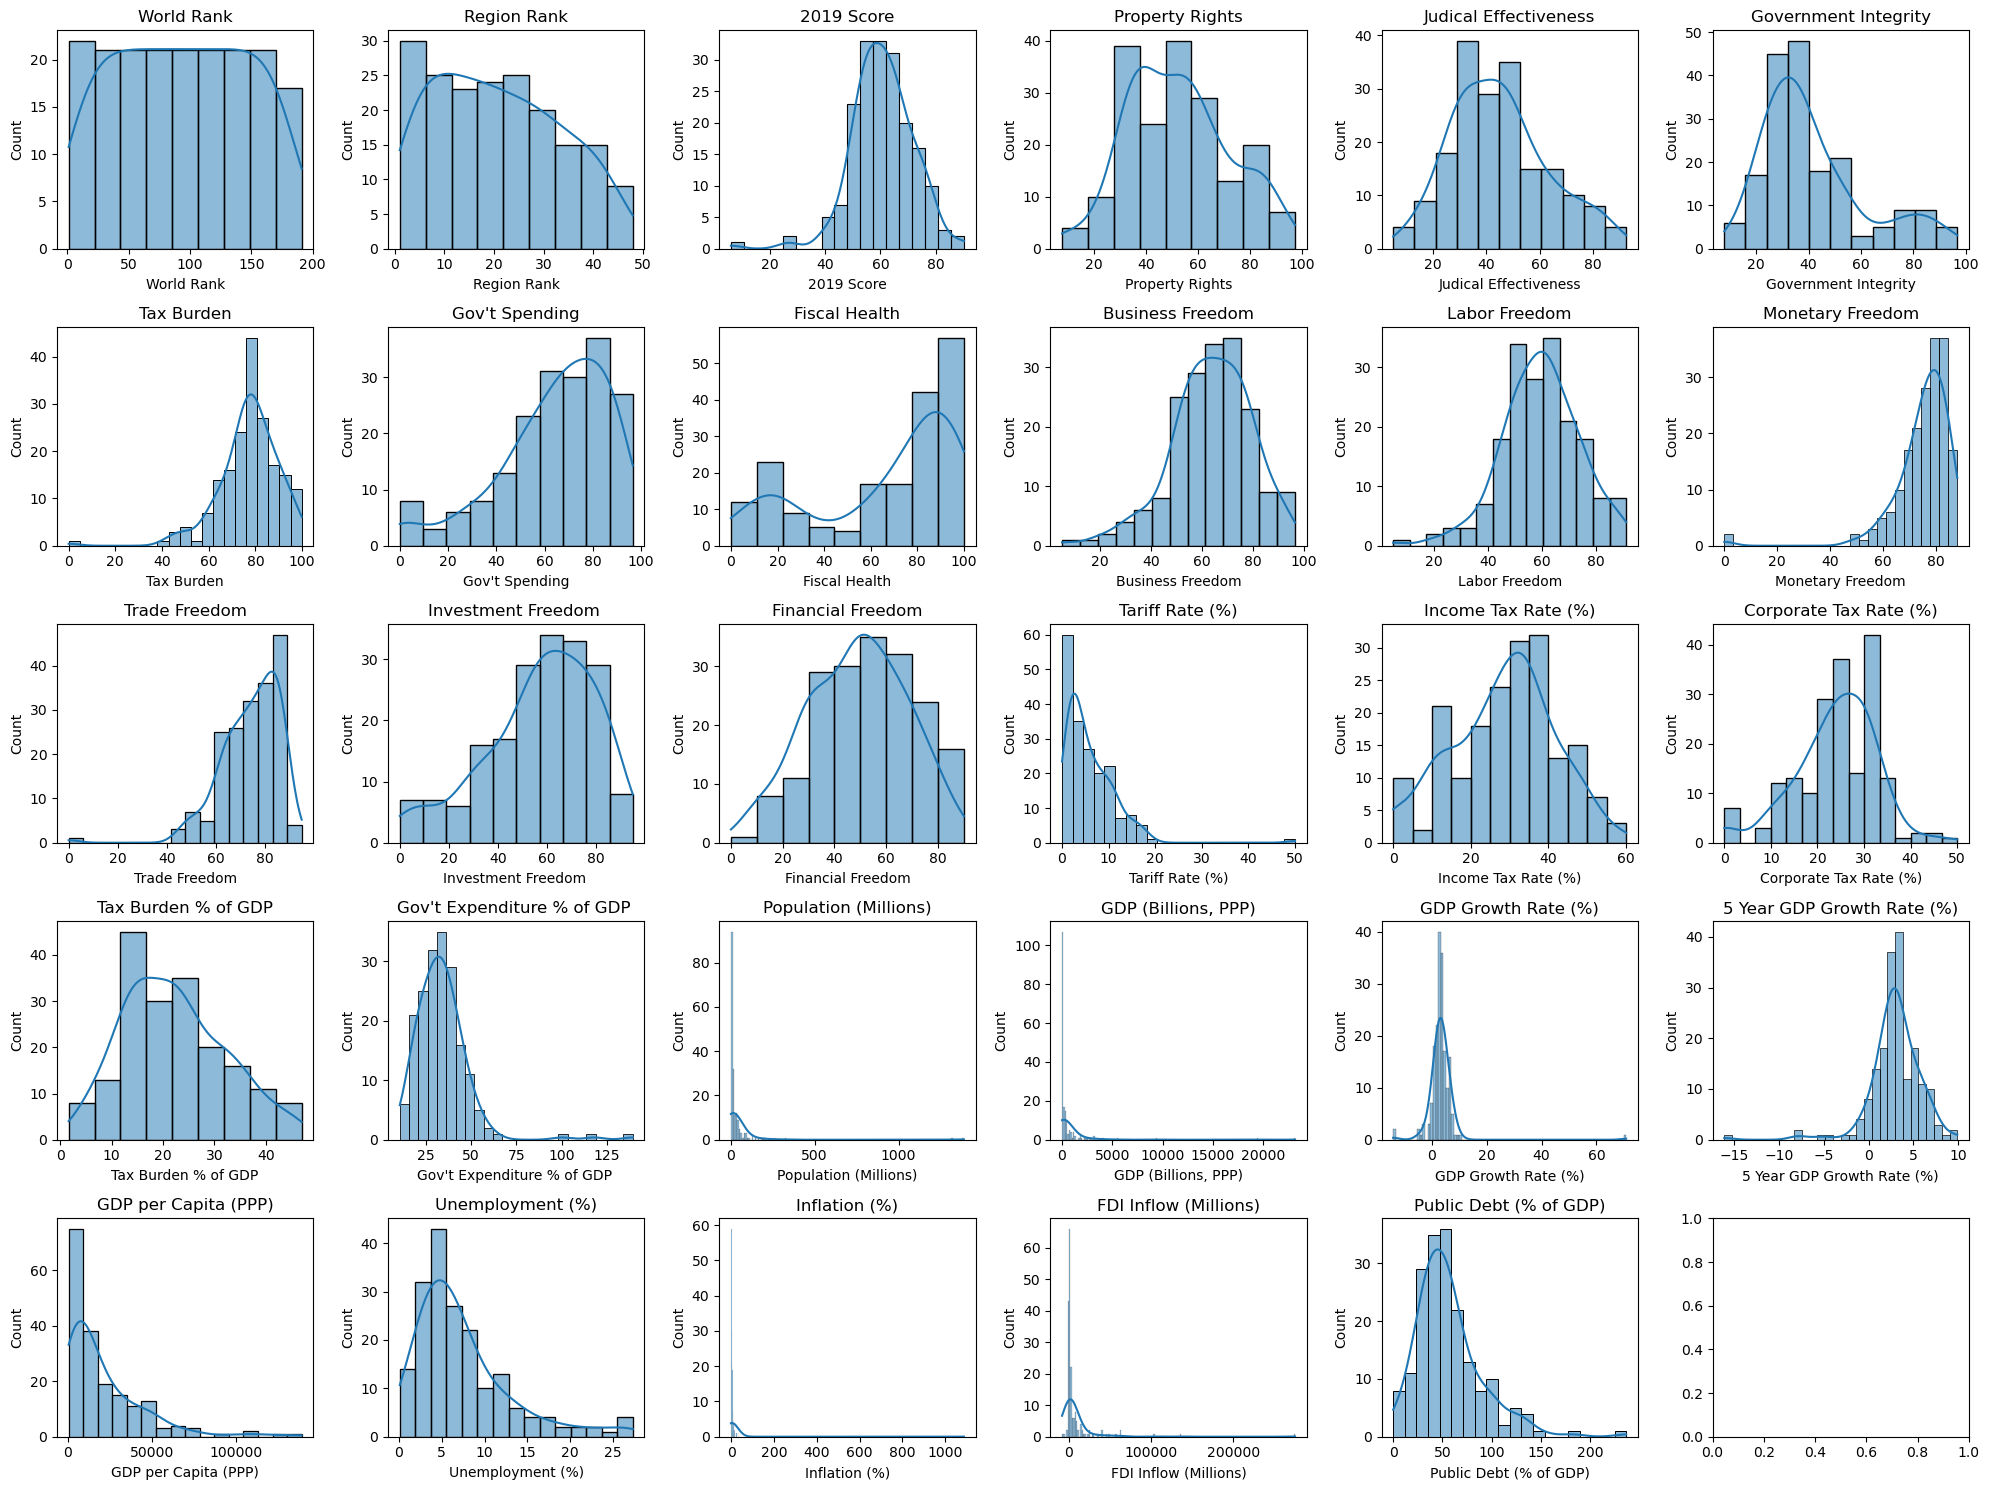

In [37]:
fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(20, 15))
axes = axes.flatten()
for i, col in enumerate(df_numeric):
    sns.histplot(df_new[col], ax=axes[i], kde=True)  
    axes[i].set_title(col)  
plt.tight_layout()  
plt.show()

- Thông qua bảng phân phối tần suất, ta có thể tìm ra được thuộc tính có giá trị ngoại lai, thuộc tính nào không

In [38]:
col_anomalies = [
 '2019 Score',
 'Tax Burden',
 'Labor Freedom',
 'Monetary Freedom',
    'Trade Freedom',
 'Tariff Rate (%)',
 "Gov't Expenditure % of GDP ",
 'Population (Millions)',
 'GDP (Billions, PPP)',
 'GDP Growth Rate (%)',
 '5 Year GDP Growth Rate (%)',
 'GDP per Capita (PPP)',
 'Inflation (%)',
 'FDI Inflow (Millions)',
 'Public Debt (% of GDP)']

In [39]:
def find_anomalies(data):
    anomalies = []
    # đặt giới hạn trên và dưới thành 3 độ lệch chuẩn
    random_data_std = sts.stdev(data)
    random_data_mean = sts.mean(data)
    anomaly_cut_off = random_data_std * 3
    lower_limit = random_data_mean - anomaly_cut_off
    upper_limit = random_data_mean + anomaly_cut_off
    # Tạo mảng outliers
    for i in data:
        if i>upper_limit or i<lower_limit:
            anomalies.append(i)
    return anomalies

In [40]:
for i in col_anomalies:
     print(i,"Tìm được",find_anomalies(df_new[i]))

2019 Score Tìm được [5.9, 25.9]
Tax Burden Tìm được [0.0]
Labor Freedom Tìm được [5.0]
Monetary Freedom Tìm được [0.0, 0.0]
Trade Freedom Tìm được [0.0]
Tariff Rate (%) Tìm được [50.0]
Gov't Expenditure % of GDP  Tìm được [117.9, 100.0, 139.2]
Population (Millions) Tìm được [1390.1, 1316.9]
GDP (Billions, PPP) Tìm được [23159.1, 9459.0, 19390.6]
GDP Growth Rate (%) Tìm được [70.8, -14.0]
5 Year GDP Growth Rate (%) Tìm được [-7.9, -7.8, -16.1]
GDP per Capita (PPP) Tìm được [139100.0, 106374.0, 111629.0, 124529.0, 93906.0]
Inflation (%) Tìm được [1087.5]
FDI Inflow (Millions) Tìm được [136320.0, 104333.0, 275381.0]
Public Debt (% of GDP) Tìm được [181.9, 236.4]


In [68]:
empty_anomaly_count = 0
for i in col_anomalies:
    print(i, "Tìm được", find_anomalies(df_new[i]))
    anomalies = find_anomalies(df_new[i])
    if not anomalies:
        empty_anomaly_count += 1
    else:
        empty_anomaly_count = 0
        for ano in anomalies:
            df_new.loc[df_new[i] == ano, i] = df_new[i].mean()
    if empty_anomaly_count == len(col_anomalies):
        break

2019 Score Tìm được []
Tax Burden Tìm được []
Labor Freedom Tìm được []
Monetary Freedom Tìm được []
Trade Freedom Tìm được []
Tariff Rate (%) Tìm được []
Gov't Expenditure % of GDP  Tìm được []
Population (Millions) Tìm được []
GDP (Billions, PPP) Tìm được []
GDP Growth Rate (%) Tìm được []
5 Year GDP Growth Rate (%) Tìm được []
GDP per Capita (PPP) Tìm được []
Inflation (%) Tìm được []
FDI Inflow (Millions) Tìm được []
Public Debt (% of GDP) Tìm được []


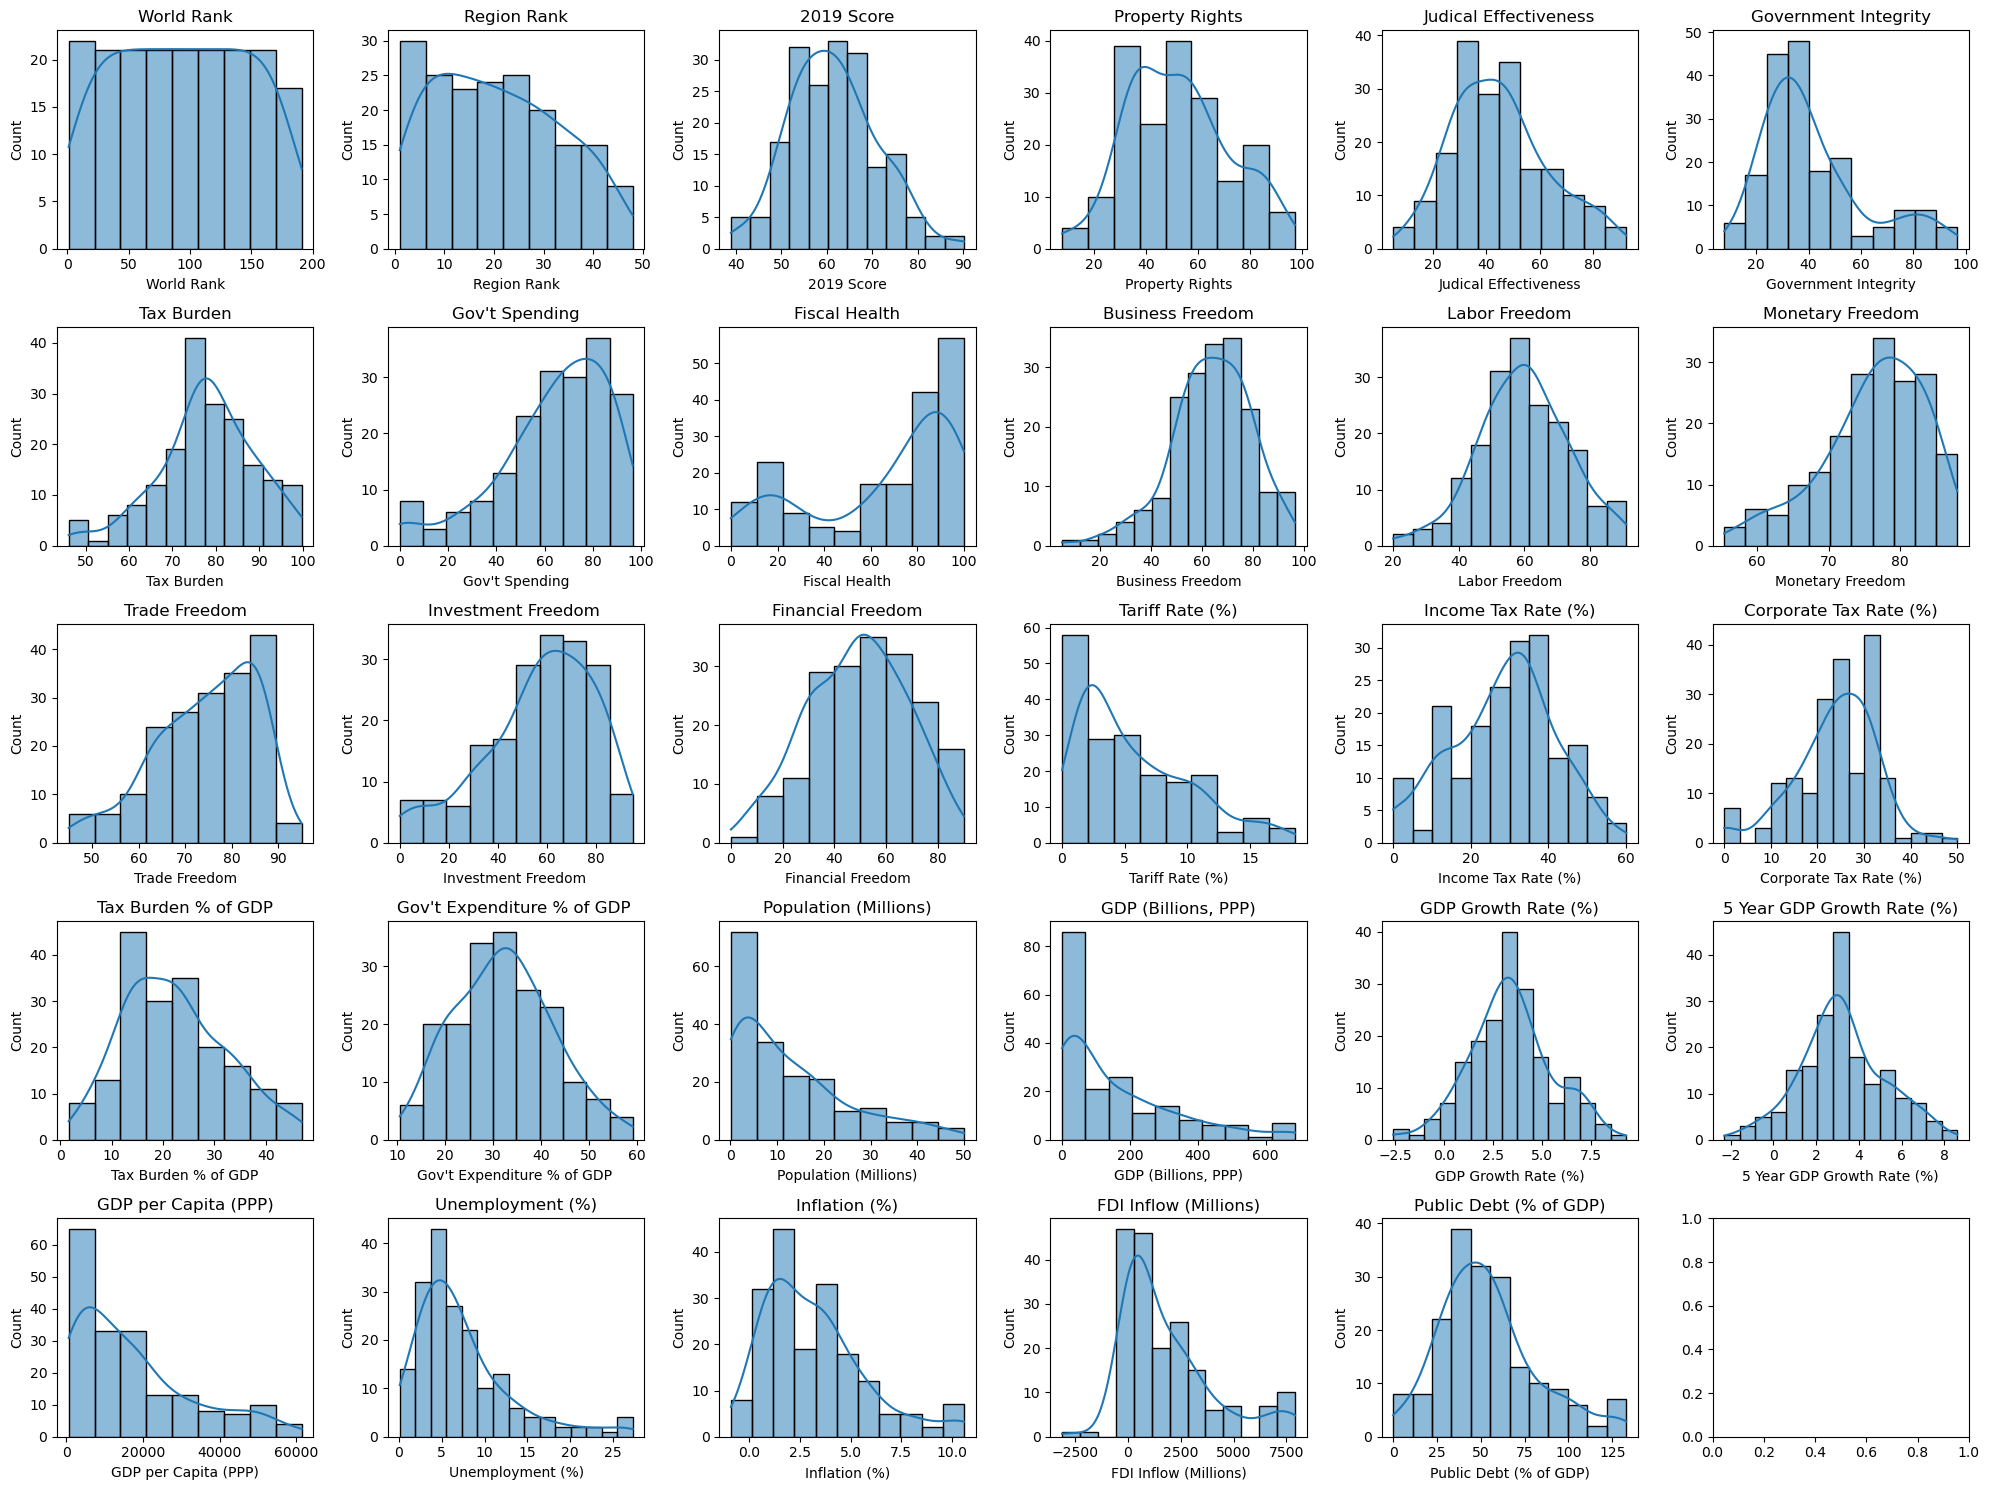

In [69]:
fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(20, 15))
axes = axes.flatten()
for i, col in enumerate(df_numeric):
    sns.histplot(df_new[col], ax=axes[i], kde=True) 
    axes[i].set_title(col)  
plt.tight_layout()  
plt.show()

-> Xử lí xong các giá trị ngoại lai

In [70]:
df_new

,CountryID,Country Name,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,...,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,1,Afghanistan,Asia-Pacific,152.0,39.0,51.500000,19.6,29.6,25.2,91.700000,...,25.600000,35.500000,69.600000,2.500000,2.900000,1958.0,8.8,5.000000,53.900000,7.300000
1,2,Albania,Europe,52.0,27.0,66.500000,54.8,30.6,40.4,86.300000,...,29.500000,2.900000,36.000000,3.900000,2.500000,12507.0,13.9,2.000000,1119.100000,71.200000
2,3,Algeria,Middle East and North Africa,171.0,14.0,46.200000,31.6,36.2,28.9,76.400000,...,41.400000,41.500000,632.900000,2.000000,3.100000,15237.0,10.0,5.600000,1203.000000,25.800000
3,4,Angola,Sub-Saharan Africa,156.0,33.0,50.600000,35.9,26.6,20.5,83.900000,...,25.300000,28.200000,190.300000,0.700000,2.900000,6753.0,8.2,4.796405,-2254.500000,65.300000
4,5,Argentina,Americas,148.0,26.0,52.200000,47.8,44.5,33.5,69.300000,...,41.000000,44.100000,185.293876,2.900000,0.700000,20876.0,8.7,4.651762,2154.291656,52.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,182,Venezuela,Americas,179.0,32.0,61.063324,7.6,13.1,7.9,74.700000,...,37.400000,31.400000,380.700000,3.108120,3.042670,12114.0,7.7,10.586264,-68.000000,34.900000
182,183,Vietnam,Asia-Pacific,128.0,30.0,55.300000,49.8,40.3,34.0,79.700000,...,29.400000,14.968036,647.400000,6.800000,6.200000,6913.0,2.1,3.500000,2218.172449,58.200000
183,184,Yemen,Middle East and North Africa,187.0,20.0,60.768333,19.6,22.2,20.3,77.212778,...,33.863736,30.000000,38.600000,3.200099,3.100964,1287.0,14.0,4.900000,-269.900000,54.297123
184,185,Zambia,Sub-Saharan Africa,138.0,27.0,53.600000,45.0,35.6,32.3,72.300000,...,25.800000,17.200000,68.900000,3.600000,4.000000,3996.0,7.8,6.600000,1091.200000,62.200000


In [135]:
df_new_out = df_new.copy()

### Xử lí các thuộc tính bị sai logic

In [72]:
df_new_out[df_new_out['FDI Inflow (Millions)'] < 0]

,CountryID,Country Name,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,...,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
3,4,Angola,Sub-Saharan Africa,156.0,33.0,50.600000,35.9,26.6,20.5,83.900000,...,25.300000,28.2,190.3,0.700000,2.900000,6753.000000,8.2,4.796405,-2254.5,65.300000
22,23,Brunei Darussalam,Asia-Pacific,63.0,14.0,65.100000,64.0,56.0,43.7,90.700000,...,36.600000,0.4,33.5,0.500000,-1.400000,18745.758006,7.1,-0.100000,-46.3,2.700000
45,46,Denmark,Europe,14.0,6.0,76.700000,86.2,77.8,85.8,77.627900,...,53.400000,5.7,286.8,2.100000,1.600000,49883.000000,5.7,1.100000,-3114.7,36.400000
55,56,Eswatini,Sub-Saharan Africa,132.0,23.0,54.700000,41.7,42.9,35.0,74.800000,...,33.900000,1.1,11.3,0.200000,2.000000,9884.000000,26.4,6.300000,-136.8,29.200000
74,75,Iceland,Europe,11.0,4.0,77.100000,87.4,63.8,83.8,72.700000,...,43.200000,0.3,17.6,3.600000,4.400000,51842.000000,2.8,1.800000,-5.4,40.900000
130,131,Papua New Guinea,Asia-Pacific,101.0,21.0,58.400000,37.4,49.0,37.2,71.800000,...,19.100000,8.3,30.3,2.500000,5.800000,3675.000000,2.7,5.200000,-200.5,32.600000
158,159,Suriname,Americas,165.0,28.0,48.100000,49.1,22.2,35.5,70.900000,...,27.600000,0.6,8.5,0.000000,-0.900000,14606.000000,8.1,3.745007,-87.3,72.100000
178,179,Uruguay,Americas,40.0,6.0,68.600000,68.3,58.9,69.2,77.200000,...,32.900000,3.5,78.1,3.100000,2.600000,22371.000000,7.9,6.200000,-124.6,66.200000
181,182,Venezuela,Americas,179.0,32.0,61.063324,7.6,13.1,7.9,74.700000,...,37.400000,31.4,380.7,3.108120,3.042670,12114.000000,7.7,10.586264,-68.0,34.900000
183,184,Yemen,Middle East and North Africa,187.0,20.0,60.768333,19.6,22.2,20.3,77.212778,...,33.863736,30.0,38.6,3.200099,3.100964,1287.000000,14.0,4.900000,-269.9,54.297123


In [73]:
df_new_out['FDI Inflow (Millions)'] = np.where(df_new_out['FDI Inflow (Millions)'] < 0, np.nan,df_new_out['FDI Inflow (Millions)'])

In [74]:
df_new_out[df_new_out['FDI Inflow (Millions)'] < 0]

,CountryID,Country Name,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,...,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)


In [75]:
df_new_out['FDI Inflow (Millions)'].fillna(df_new_out['FDI Inflow (Millions)'].mean(),inplace=True)

<Axes: xlabel='FDI Inflow (Millions)', ylabel='Count'>

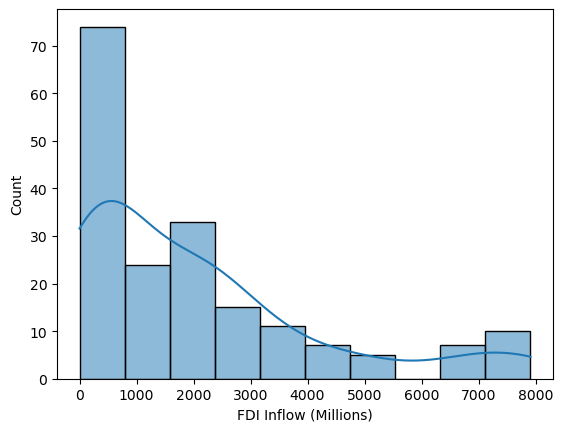

In [76]:
sns.histplot(data = df_new_out, x= df_new_out['FDI Inflow (Millions)'], kde=True)

# EDA

In [77]:
df_new_out

,CountryID,Country Name,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,...,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,1,Afghanistan,Asia-Pacific,152.0,39.0,51.500000,19.6,29.6,25.2,91.700000,...,25.600000,35.500000,69.600000,2.500000,2.900000,1958.0,8.8,5.000000,53.900000,7.300000
1,2,Albania,Europe,52.0,27.0,66.500000,54.8,30.6,40.4,86.300000,...,29.500000,2.900000,36.000000,3.900000,2.500000,12507.0,13.9,2.000000,1119.100000,71.200000
2,3,Algeria,Middle East and North Africa,171.0,14.0,46.200000,31.6,36.2,28.9,76.400000,...,41.400000,41.500000,632.900000,2.000000,3.100000,15237.0,10.0,5.600000,1203.000000,25.800000
3,4,Angola,Sub-Saharan Africa,156.0,33.0,50.600000,35.9,26.6,20.5,83.900000,...,25.300000,28.200000,190.300000,0.700000,2.900000,6753.0,8.2,4.796405,2021.429988,65.300000
4,5,Argentina,Americas,148.0,26.0,52.200000,47.8,44.5,33.5,69.300000,...,41.000000,44.100000,185.293876,2.900000,0.700000,20876.0,8.7,4.651762,2154.291656,52.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,182,Venezuela,Americas,179.0,32.0,61.063324,7.6,13.1,7.9,74.700000,...,37.400000,31.400000,380.700000,3.108120,3.042670,12114.0,7.7,10.586264,2021.429988,34.900000
182,183,Vietnam,Asia-Pacific,128.0,30.0,55.300000,49.8,40.3,34.0,79.700000,...,29.400000,14.968036,647.400000,6.800000,6.200000,6913.0,2.1,3.500000,2218.172449,58.200000
183,184,Yemen,Middle East and North Africa,187.0,20.0,60.768333,19.6,22.2,20.3,77.212778,...,33.863736,30.000000,38.600000,3.200099,3.100964,1287.0,14.0,4.900000,2021.429988,54.297123
184,185,Zambia,Sub-Saharan Africa,138.0,27.0,53.600000,45.0,35.6,32.3,72.300000,...,25.800000,17.200000,68.900000,3.600000,4.000000,3996.0,7.8,6.600000,1091.200000,62.200000


In [78]:
df_corr = df_new_out.corr() #Tạo ma trận tương quan
mask = np.triu(np.ones_like(df_corr, dtype=bool)) #Lấy ra tam giác trên của ma trận tương quan
half_corr_matrix = df_corr.mask(mask)

C:\Users\HP\AppData\Local\Temp\ipykernel_13856\2820597975.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df_new_out.corr() #Tạo ma trận tương quan


<Axes: >

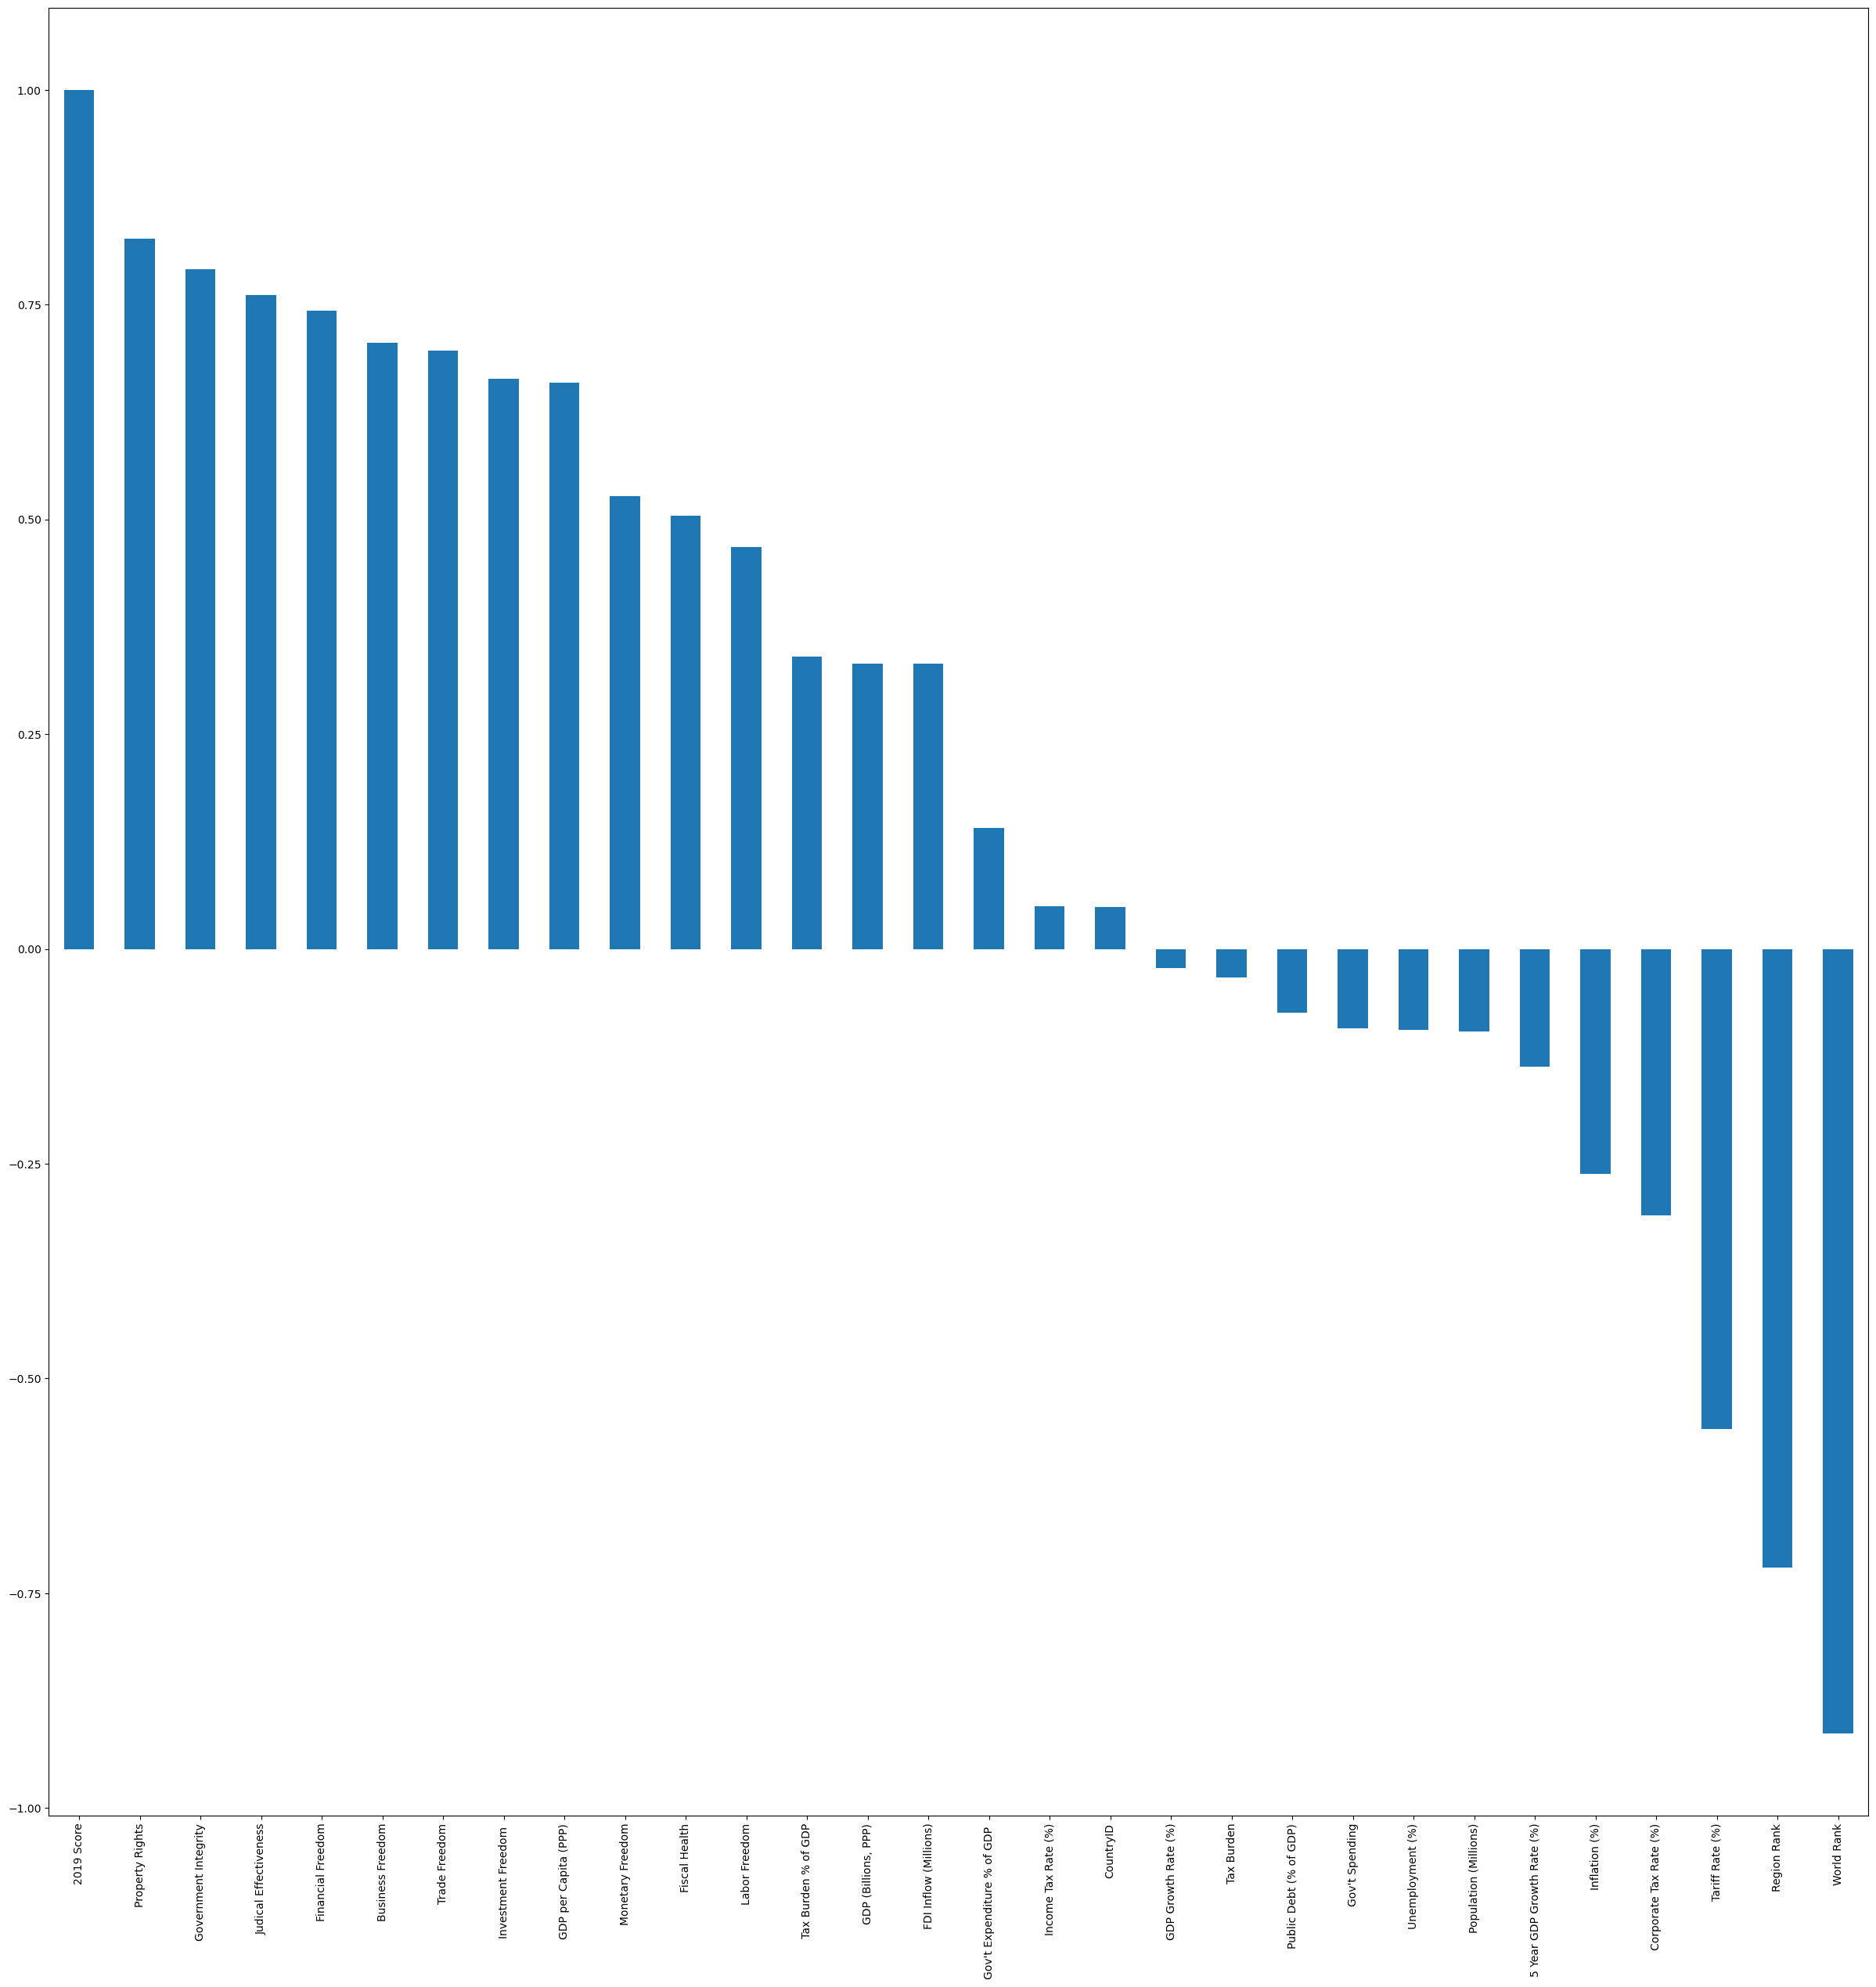

In [79]:
plt.figure(figsize=(30,30))
df_corr['2019 Score'].sort_values(ascending=False).plot(kind='bar')

<Axes: >

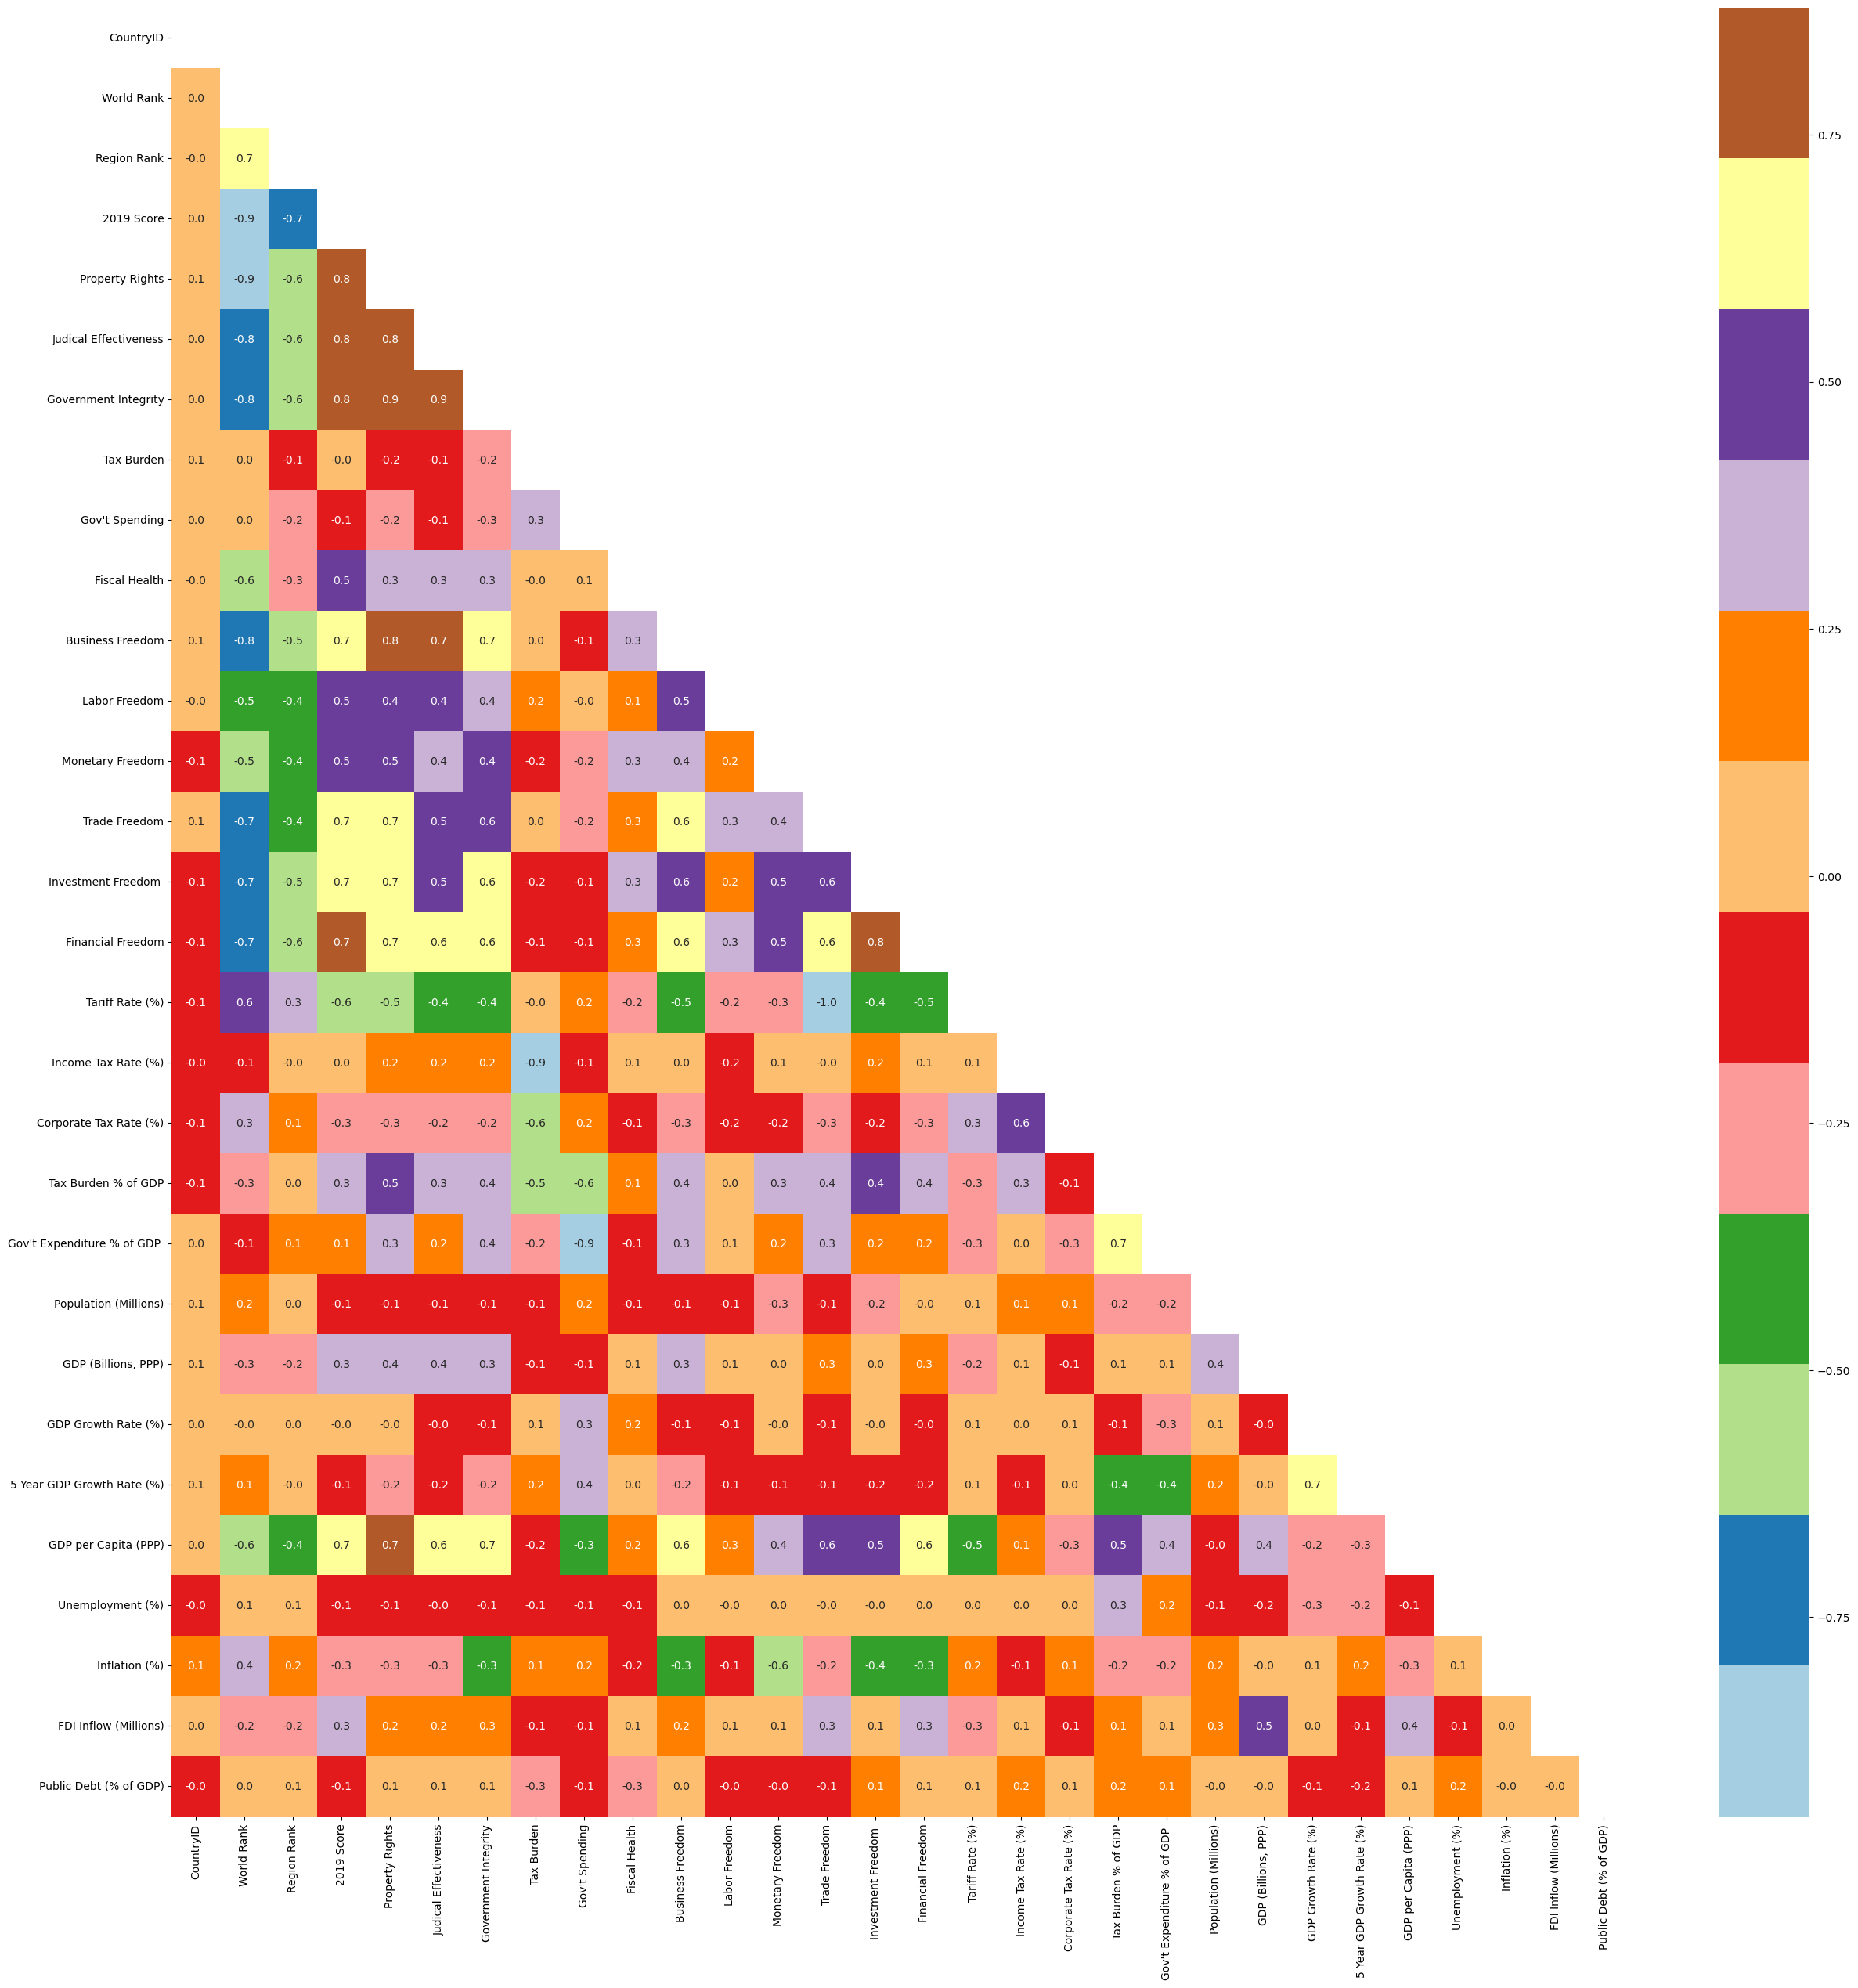

In [80]:
plt.figure(figsize=(30,30))
sns.heatmap(data=half_corr_matrix, annot=True, fmt=".1f", cmap='Paired')

Ma trận tương quan:
- Các yếu tố liên quan đến nhau ảnh hưởng đến tự do kinh tế cả 1 quốc gia:
    * '2019 Score': Điểm số năm 2019 tăng lên dựa vào các yếu tố sau:
        + 'Property Rights': Quyền sở hữu tài sản
        + 'Judicial Effectiveness': Hiệu quả tư pháp
        + 'Government Integrity': Chính trị trong sạch
        + 'Financial Freedom': Tự do tài chính
        + 'Business Freedom': Tự do kinh doanh 
        + 'Investment Freedom': Tự do đầu tư
        + 'GDP per Capita (PPP)': GDP trên mỗi người dân, được điều chỉnh theo sức mua (PPP), được đo bằng đô la.
        + 'Money Freedom': Tự do tiền tệ
        + 'Tax Burden % of GDP': Gánh nặng thuế (% GDP)
        + 'FDI Inflow (Millions)': Dòng vốn FDI (Triệu USD) 
        + 'Labor Freedom': Tự do lao động
<br>=> Các yếu tố này thể hiện sự tương quan dương chặt chẽ đến nhau

In [81]:
top_15_countries = df_new_out.sort_values(by='2019 Score',ascending=False).head(15)
top_15_countries

,CountryID,Country Name,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,...,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
72,73,Hong Kong,Asia-Pacific,1.0,1.0,90.2,93.3,75.3,83.8,93.1000,...,17.9,7.400000,454.900000,3.8,2.800000,61393.000000,3.1,1.5,7220.782894,0.1
149,150,Singapore,Asia-Pacific,2.0,2.0,89.4,97.4,92.4,95.1,90.4000,...,17.6,5.600000,527.000000,3.6,3.500000,19147.684434,2.0,0.6,4001.633670,110.9
122,123,New Zealand,Asia-Pacific,3.0,3.0,84.4,95.0,83.5,96.7,71.0000,...,40.7,4.800000,188.600000,3.0,3.300000,38934.000000,4.9,1.9,3572.000000,26.4
160,161,Switzerland,Europe,4.0,1.0,81.9,85.3,82.0,88.0,70.5000,...,34.3,8.400000,517.200000,1.1,1.600000,61422.000000,4.8,0.5,3689.782238,42.8
6,7,Australia,Asia-Pacific,5.0,4.0,80.9,79.1,86.5,79.9,62.8000,...,36.5,24.800000,216.928409,2.3,2.400000,50334.000000,5.6,2.0,5254.145566,41.6
79,80,Ireland,Europe,6.0,2.0,80.5,85.8,68.4,78.0,76.3000,...,27.4,4.700000,357.200000,7.8,3.257652,18426.133049,6.4,0.3,3102.398192,68.5
176,177,United Kingdom,Europe,7.0,3.0,78.9,92.3,85.9,83.8,64.7000,...,41.6,13.980339,319.112846,1.8,2.200000,44118.000000,4.3,2.7,2287.005752,87.0
29,30,Canada,Americas,8.0,1.0,77.7,87.0,69.4,84.6,76.8000,...,40.3,36.700000,249.253019,3.0,2.100000,48265.000000,6.3,1.6,3489.264401,89.7
175,176,United Arab Emirates,Middle East and North Africa,9.0,1.0,77.6,81.8,87.1,78.8,99.2000,...,32.3,10.100000,686.800000,0.5,3.300000,17830.306238,1.7,2.0,2009.994010,19.5
162,163,Taiwan,Asia-Pacific,10.0,5.0,77.3,85.4,70.1,69.2,75.0000,...,17.7,23.600000,196.219041,2.8,2.200000,50294.000000,3.8,0.6,3255.000000,35.2


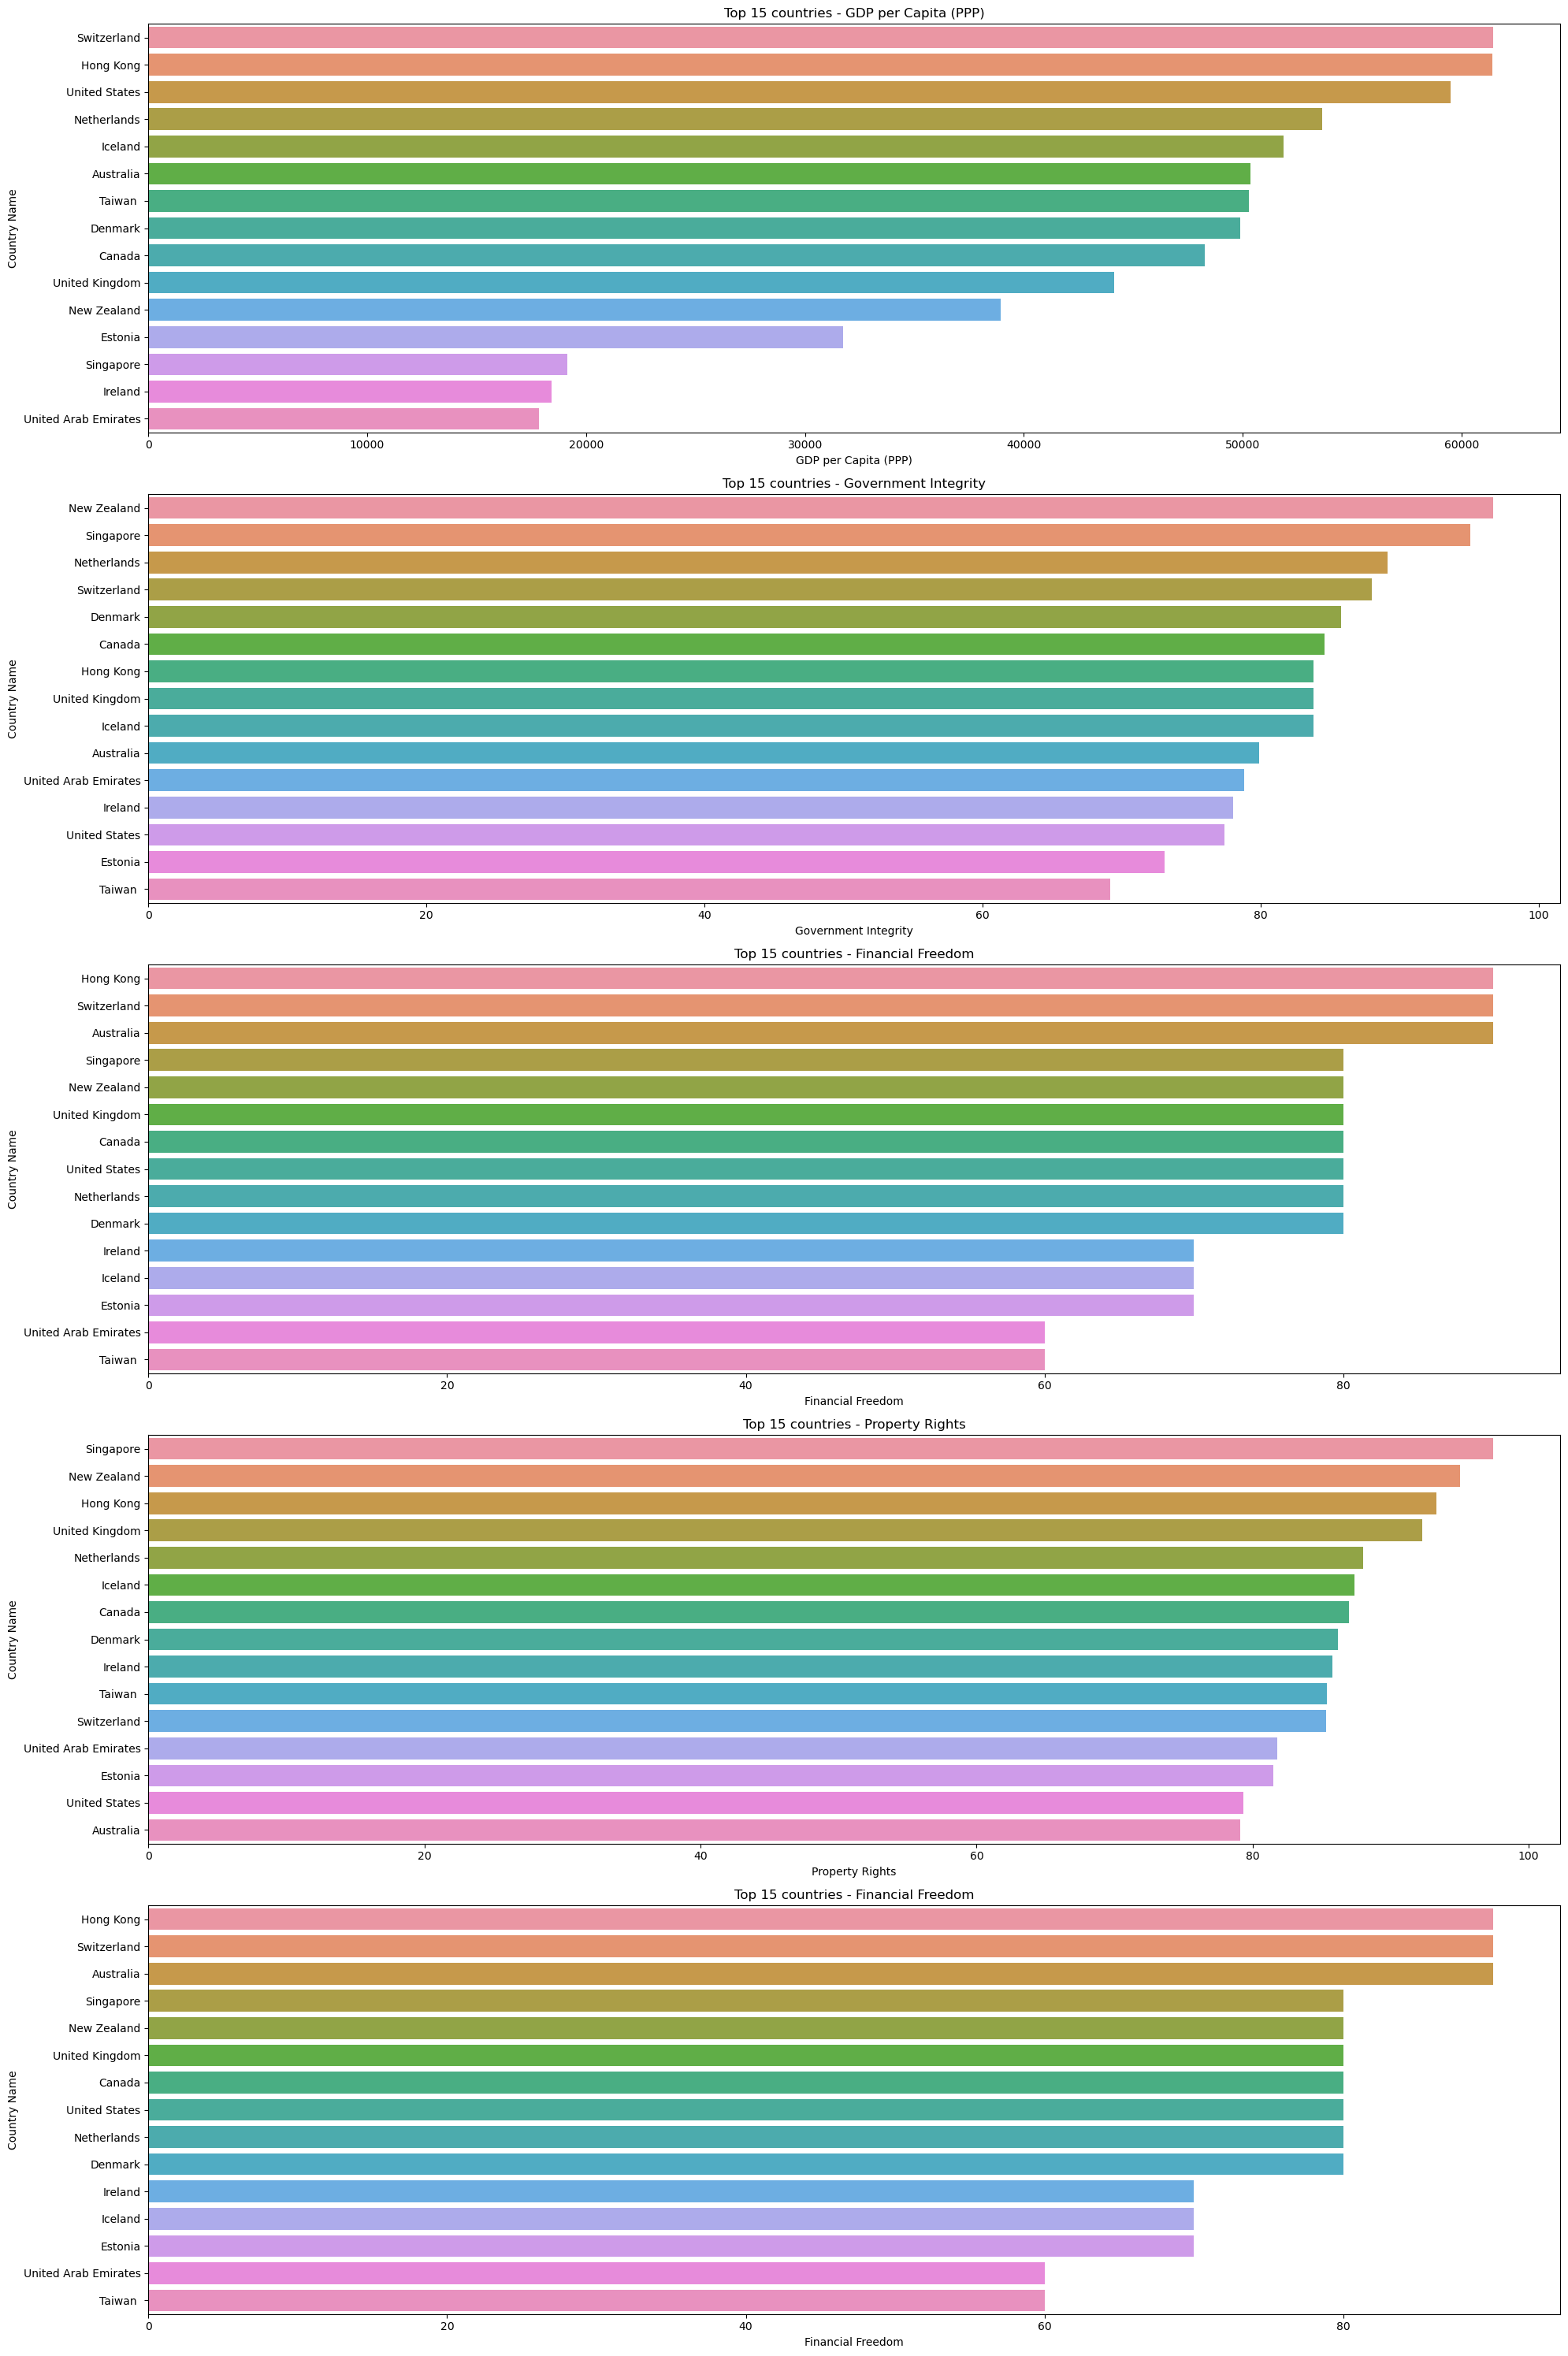

In [87]:
col = ['GDP per Capita (PPP)','Government Integrity','Financial Freedom','Property Rights','Financial Freedom']
fig, axes = plt.subplots(nrows=len(col), ncols=1, figsize=(20, 30))
for i, val in enumerate(col):
    sorted_top_15_countries = top_15_countries.sort_values(by=val, ascending=False)
    sns.barplot(data=sorted_top_15_countries, x=val, y='Country Name', ax=axes[i])
    axes[i].set_title('Top 15 countries - ' + val)
plt.tight_layout()
plt.show()

- Qua biểu đồ biểu diễn dữ liệu có thể suy ra một vài kết luận:
    + Hong Kong, Thụy Điển, Singapore và Hà Lan luôn nằm trong top những nước có người dân có nguồn thu nhập cao, sở hưu nhiều tài sản và đặc biệt là có chính phủ tốt, trong sạch, không có tham nhũng, tham ô
    + Về tự do tài chính thì các quốc gia như Hong Kong, Thụy Điển và Úc luôn nằm trong số những quốc gia có sự tự do tài chính cao

Text(0.5, 1.0, 'Tổng giá trị đầu tư trực tiếp từ nước ngoài năm 2019')

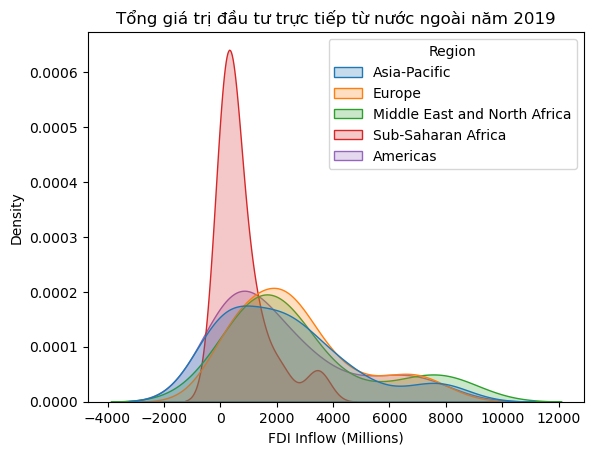

In [83]:
sns.kdeplot(data= df_new_out, x = df_new_out['FDI Inflow (Millions)'], hue = df_new_out['Region'],fill=True, common_norm=False)
plt.title('Tổng giá trị đầu tư trực tiếp từ nước ngoài năm 2019')

- Vào năm 2019 có sự biến động về nguồn vốn đầu tư từ nước ngoài đặc biệt là vùng nam mĩ được nhiều nhà đầu tư đổ dồn vào
- Tiếp theo là các vùng kinh tế trên thế giới như Châu á hay Châu Âu và các vùng kinh tế khác ít thu hút các nhà đầu tư từ nước ngoài thậm chí FDI lỗ âm vốn nhưng vẫn có được sự đầu tư lên tới gần 12000 triệu đô cao hơn so với Nam Mĩ khi chỉ được đầu tư gần 4500 triệu đô 
- Điều này có nghĩa là các vùng kính tế khác vẫn được các nhà đầu tư quan tâm và để ý

<Axes: xlabel='GDP per Capita (PPP)', ylabel='Property Rights'>

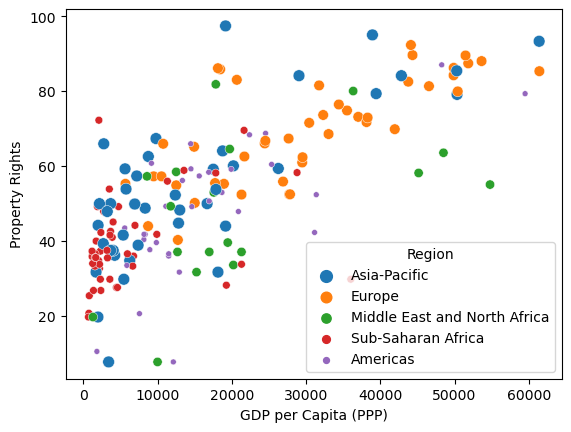

In [96]:
sns.scatterplot(data = df_new_out, x =df_new_out['GDP per Capita (PPP)'],y =df_new_out['Property Rights'], hue = df_new_out['Region'],size=df_new_out['Region'])

- Ở các khu vực Châu Á hay Châu Mỹ la-tinh thì người dân ở đó có thể mua nhà hay xe cộ với giá rẻ, chỉ càn thu nhập dưới 20k đô một năm/tháng là có thể sở hưu một vài tài sản với mức giá phải chăng với họ.
- Ở các nước phát triển hơn như Mỹ hay Châu Âu thì mức thu nhập cao gần 55k đô mới có thể sở hữu tài sản, điều này cũng có thể hiểu vì mức sống cao đồng nghĩa với mọi thứ ở đó đều cao.

<Axes: xlabel='Tax Burden % of GDP', ylabel='GDP per Capita (PPP)'>

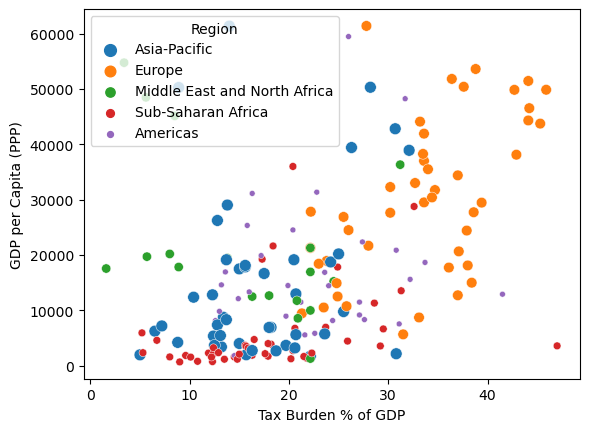

In [93]:
sns.scatterplot(data = df_new_out, x = df_new_out['Tax Burden % of GDP'],y =df_new_out['GDP per Capita (PPP)'],hue=df_new_out['Region'],size=df_new_out['Region'])

- Châu Á và Châu Mỹ la-tinh thì người dân ở đó phải đóng thuế tầm trung 15% - 20% số thu nhập và thu nhập người dân thường sẽ nằm trong khoảng 10k - 30k, đố là mức thu nhập không quá cao so với mức thuế phải bỏ ra.
- Ở Châu Âu thì người dân phải đóng thuế lên tới trên 40% số thu nhập và thu nhập của họ dao động trong khoảng từ 10k - trên 50k đô, một mức thu nhập khá cao so với các khu vực trên thế giới

<Axes: xlabel='Labor Freedom', ylabel='Business Freedom'>

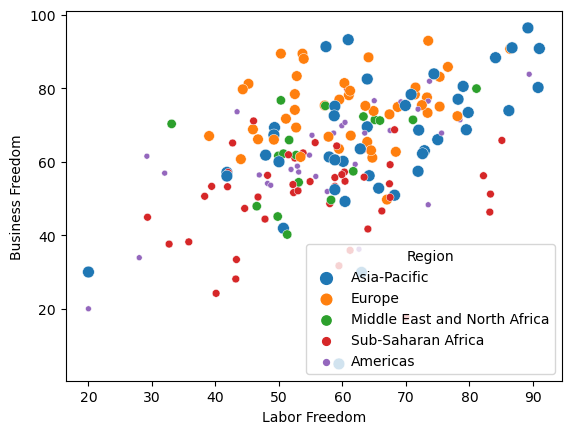

In [97]:
sns.scatterplot(data = df_new_out, x = df_new_out['Labor Freedom'],y =df_new_out['Business Freedom'],hue=df_new_out['Region'],size=df_new_out['Region'])

- Mức độ tư do lao động và tự do kinh doanh nằm trong khoảng từ 40 - 85 cho thấy người dân có thể được tự do kinh doanh hoặc đi làm để kiếm tiền, đồng thời các công việc hiện tại đang khan hiếm người lao động.

# Marchine Learning

In [136]:
df_learn = df_new_out.copy()

In [128]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

In [137]:
df_learn.drop(['Country Name','CountryID'], axis=1,inplace=True)

In [138]:
le = LabelEncoder()
le.fit(df_learn['Region'])
df_learn['Region'] = le.transform(df_learn['Region'])

In [151]:
pca = PCA()
df_decomp = pca.fit_transform(df_learn)

In [174]:
kmean=KMeans(n_clusters=3,random_state=0, n_init="auto").fit(df_decomp)

D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [175]:
labels = kmean.labels_

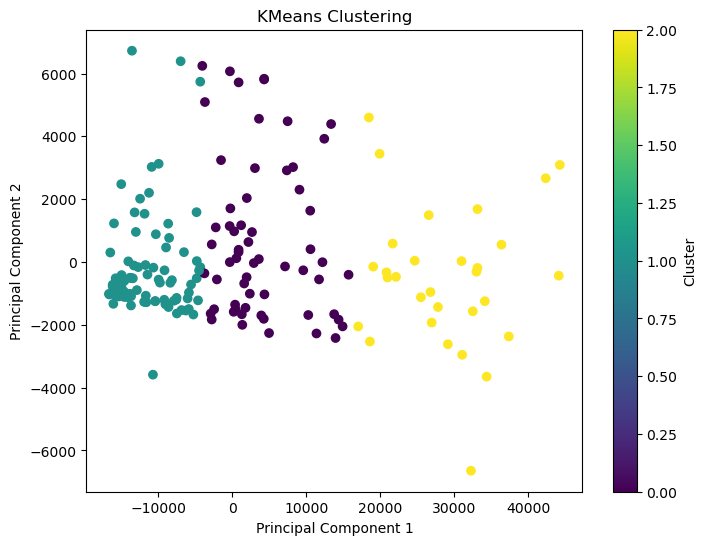

In [176]:
plt.figure(figsize=(8, 6))
plt.scatter(df_decomp[:, 0], df_decomp[:, 1], c=labels, cmap='viridis')
plt.title('KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [177]:
label_mapping = {0: 'Least Developed Country', 1: 'Developing Country', 2: 'Developed Country'}
cluster_categories = pd.Series(labels).map(label_mapping)

In [182]:
df_new_out['Country Develop'] = cluster_categories

In [186]:
df_new_out

,CountryID,Country Name,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,...,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP),Country Develop
0,1,Afghanistan,Asia-Pacific,152.0,39.0,51.500000,19.6,29.6,25.2,91.700000,...,35.500000,69.600000,2.500000,2.900000,1958.0,8.8,5.000000,53.900000,7.300000,Developing Country
1,2,Albania,Europe,52.0,27.0,66.500000,54.8,30.6,40.4,86.300000,...,2.900000,36.000000,3.900000,2.500000,12507.0,13.9,2.000000,1119.100000,71.200000,Developing Country
2,3,Algeria,Middle East and North Africa,171.0,14.0,46.200000,31.6,36.2,28.9,76.400000,...,41.500000,632.900000,2.000000,3.100000,15237.0,10.0,5.600000,1203.000000,25.800000,Least Developed Country
3,4,Angola,Sub-Saharan Africa,156.0,33.0,50.600000,35.9,26.6,20.5,83.900000,...,28.200000,190.300000,0.700000,2.900000,6753.0,8.2,4.796405,-2254.500000,65.300000,Developing Country
4,5,Argentina,Americas,148.0,26.0,52.200000,47.8,44.5,33.5,69.300000,...,44.100000,185.293876,2.900000,0.700000,20876.0,8.7,4.651762,2154.291656,52.600000,Least Developed Country
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,182,Venezuela,Americas,179.0,32.0,61.063324,7.6,13.1,7.9,74.700000,...,31.400000,380.700000,3.108120,3.042670,12114.0,7.7,10.586264,-68.000000,34.900000,Developing Country
182,183,Vietnam,Asia-Pacific,128.0,30.0,55.300000,49.8,40.3,34.0,79.700000,...,14.968036,647.400000,6.800000,6.200000,6913.0,2.1,3.500000,2218.172449,58.200000,Developing Country
183,184,Yemen,Middle East and North Africa,187.0,20.0,60.768333,19.6,22.2,20.3,77.212778,...,30.000000,38.600000,3.200099,3.100964,1287.0,14.0,4.900000,-269.900000,54.297123,Developing Country
184,185,Zambia,Sub-Saharan Africa,138.0,27.0,53.600000,45.0,35.6,32.3,72.300000,...,17.200000,68.900000,3.600000,4.000000,3996.0,7.8,6.600000,1091.200000,62.200000,Developing Country


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Asia-Pacific'),
  Text(1, 0, 'Europe'),
  Text(2, 0, 'Middle East and North Africa'),
  Text(3, 0, 'Sub-Saharan Africa'),
  Text(4, 0, 'Americas')])

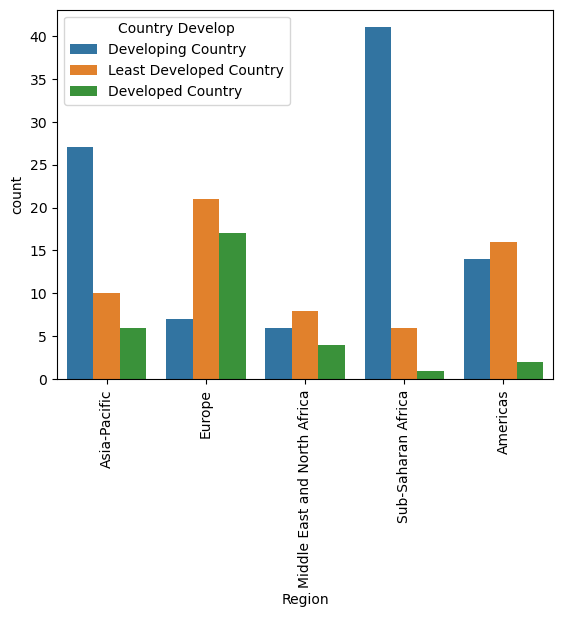

In [187]:
sns.countplot(data= df_new_out, x= df_new_out['Region'], hue=df_new_out['Country Develop'])
plt.xticks(rotation=90)